In [809]:
#import neophodnih biblioteka
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

# UNSW_NB15 dataset

*Ucitavanje dataset-a:*

In [810]:

DATA_DIR=Path.cwd() / 'kaggle_unsw'
unsw_trset = pd.read_csv(DATA_DIR / 'UNSW_NB15_training-set.csv')

unsw_trset.shape

(175341, 45)

*Osnovne informacije o našem dataset-u:*

In [811]:
unsw_trset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [812]:
num_cols = unsw_trset.select_dtypes(include=['int64', 'float64']).columns
print("Broj numeričkih kolona:", len(num_cols))
print("Numeričke kolone:\n", num_cols.tolist())

Broj numeričkih kolona: 41
Numeričke kolone:
 ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']


In [813]:
cat_cols = unsw_trset.select_dtypes(include=['object']).columns
print("\nBroj kategorijskih kolona:", len(cat_cols))
print("Kategorijske kolone:\n", cat_cols.tolist())


Broj kategorijskih kolona: 4
Kategorijske kolone:
 ['proto', 'service', 'state', 'attack_cat']


In [814]:
print("Uzimanje malog uzorka radi sticanja prvog utiska o dataset-u:")
unsw_trset.iloc[[100, 1000, 5000]]

Uzimanje malog uzorka radi sticanja prvog utiska o dataset-u:


id        dur proto service state  spkts  dpkts  sbytes  dbytes  \
100    101  33.787666   tcp    http   FIN     14     18    1684   10168   
1000  1001   1.737904   tcp       -   FIN     38     40    2438   18508   
5000  5001   1.007441   tcp    http   FIN     14     18    1684   10168   

           rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
100    0.917495  ...                 1               2             0   
1000  44.306246  ...                 1               1             0   
5000  30.771031  ...                 1               1             0   

      ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
100            0                 1           4           5                0   
1000           0                 0          12          10                0   
5000           0                 1          11           2                0   

      attack_cat  label  
100       Normal      0  
1000      Normal      0  
5000      Normal      0  

[3 rows x 45 columns]

In [815]:
ignore = ['id', 'label']
num_cols = [c for c in unsw_trset.columns if c not in ignore]

print("Statistike numeričkih varijabli:")
unsw_trset[num_cols].describe()


Statistike numeričkih varijabli:


dur          spkts          dpkts        sbytes  \
count  175341.000000  175341.000000  175341.000000  1.753410e+05   
mean        1.359389      20.298664      18.969591  8.844844e+03   
std         6.480249     136.887597     110.258271  1.747656e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001582       2.000000       2.000000  4.300000e+02   
75%         0.668069      12.000000      10.000000  1.418000e+03   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753410e+05  1.753410e+05  175341.000000  175341.000000  1.753410e+05   
mean   1.492892e+04  9.540619e+04     179.546997      79.609567  7.345403e+07   
std    1.436542e+05  1.654010e+05     102.940011     110.506863  1.883574e+08   
min    0.000000e+00  0.000000e+00       0.000000       0.000000  0.000000e+00   
25%    0.000000e+00  3.278614e+01      62.000000       0.000000  1.305334e+04   
50%    1.640000e+02  3.225807e+03     254.000000      29.000000  8.796748e+05   
75%    1.102000e+03  1.250000e+05     254.000000     252.000000  8.888889e+07   
max    1.465555e+07  1.000000e+06     255.000000     254.000000  5.988000e+09   

              dload  ...     ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
count  1.753410e+05  ...  175341.000000     175341.000000     175341.000000   
mean   6.712056e+05  ...       6.193936          5.383538          4.206255   
std    2.421312e+06  ...       8.052476          8.047104          5.783585   
min    0.000000e+00  ...       1.000000          1.000000          1.000000   
25%    0.000000e+00  ...       1.000000          1.000000          1.000000   
50%    1.447023e+03  ...       2.000000          1.000000          1.000000   
75%    2.784487e+04  ...       7.000000          5.000000          3.000000   
max    2.242273e+07  ...      51.000000         51.000000         46.000000   

       ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd  \
count   175341.000000  175341.000000  175341.000000     175341.000000   
mean         8.729881       0.014948       0.014948          0.133066   
std         10.956186       0.126048       0.126048          0.701208   
min          1.000000       0.000000       0.000000          0.000000   
25%          1.000000       0.000000       0.000000          0.000000   
50%          3.000000       0.000000       0.000000          0.000000   
75%         12.000000       0.000000       0.000000          0.000000   
max         65.000000       4.000000       4.000000         30.000000   

          ct_src_ltm     ct_srv_dst  is_sm_ips_ports  
count  175341.000000  175341.000000    175341.000000  
mean        6.955789       9.100758         0.015752  
std         8.321493      10.756952         0.124516  
min         1.000000       1.000000         0.000000  
25%         2.000000       2.000000         0.000000  
50%         3.000000       4.000000         0.000000  
75%         9.000000      12.000000         0.000000  
max        60.000000      62.000000         1.000000  

[8 rows x 39 columns]

Na osnovu ovih statistika, možemo zaključiti da su skoro sve numeričke kolone asimetrične, i to uglavnom sa pozitivnom (desnom) asimetrijom.  
To se vidi iz razlika između srednje vrednosti (mean) i medijane (50. percentil), kao i iz ogromne razlike između 75. percentila i maksimalne vrednosti (max).

In [816]:
print("Statistike kategorijskih varijabli:")
unsw_trset[['proto', 'service', 'state', 'attack_cat']].describe()

Statistike kategorijskih varijabli:


proto service   state attack_cat
count   175341  175341  175341     175341
unique     133      13       9         10
top        tcp       -     INT     Normal
freq     79946   94168   82275      56000

**Na osnovu statistika možemo zaključiti:**
* da 'proto' ima 133 različite vrednosti, ali najčešći je TCP
* service = '-' u preko više od pola podataka, što se može okarakterisati kao null vrednost
* imamo 9 vrsta attack kategorija i Normal kategoriju, koja je najčešća

**Naše target kolone su label i attack_cat.**

# Data Cleaning - Miloš i Tamara


In [817]:
#Uklanjanje whitespaces i id kolone, obzirom da nam nije potrebna
unsw_trset.columns = unsw_trset.columns.str.strip()
unsw_trset.drop(columns=['id'], inplace=True)

In [818]:
#Vrednosti kolone 'is_ftp_login' nisu binary, iako bi trebalo da jesu, tako da to moramo rešiti.
unsw_trset['is_ftp_login'].unique()
unsw_trset['is_ftp_login'].value_counts()

is_ftp_login
0    172774
1      2545
4        16
2         6
Name: count, dtype: int64

In [819]:
#proveravamo koje su to vrednosti
unsw_trset[unsw_trset['is_ftp_login'].isin([2, 4])]

dur proto service state  spkts  dpkts  sbytes  dbytes  \
13114    1.459935   tcp     ftp   FIN     32     34    1786    2340   
13130    1.459935   tcp     ftp   FIN     32     34    1786    2340   
48027   55.968578   tcp     ftp   FIN     28     24    1560    1364   
48224   34.455128   tcp     ftp   FIN     30     24    1610    1364   
48306   55.968578   tcp     ftp   FIN     28     24    1560    1364   
48439   34.455128   tcp     ftp   FIN     30     24    1610    1364   
81497    1.564220   tcp     ftp   CON     14     12     690     940   
81522    0.742644   tcp     ftp   FIN     10     10     578     690   
82973    1.564220   tcp     ftp   CON     14     12     690     940   
86897    1.564220   tcp     ftp   CON     14     12     690     940   
86990    0.742644   tcp     ftp   FIN     10     10     578     690   
91976    0.742644   tcp     ftp   FIN     10     10     578     690   
92705    1.564220   tcp     ftp   CON     14     12     690     940   
92784    0.742644   tcp     ftp   FIN     10     10     578     690   
97585    2.349103   tcp     ftp   CON     14     14     690    1038   
97596    1.142602   tcp     ftp   FIN     10     10     598     690   
98495    2.349103   tcp     ftp   CON     14     14     690    1038   
98499    1.142602   tcp     ftp   FIN     10     10     598     690   
99761    2.349103   tcp     ftp   CON     14     14     690    1038   
99769    1.142602   tcp     ftp   FIN     10     10     598     690   
99820    2.349103   tcp     ftp   CON     14     14     690    1038   
101491   1.142602   tcp     ftp   FIN     10     10     598     690   

             rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
13114   44.522532    31  ...                 2               4             2   
13130   44.522532    31  ...                 2               4             2   
48027    0.911226   254  ...                 1               3             2   
48224    1.538233   254  ...                 2               4             2   
48306    0.911226   254  ...                 1               4             2   
48439    1.538233   254  ...                 2               4             2   
81497   15.982407    62  ...                 2               2             4   
81522   25.584263    62  ...                 2               3             4   
82973   15.982407    62  ...                 2               2             4   
86897   15.982407    62  ...                 2               2             4   
86990   25.584263    62  ...                 2               3             4   
91976   25.584263    62  ...                 2               3             4   
92705   15.982407    62  ...                 2               2             4   
92784   25.584263    62  ...                 2               3             4   
97585   11.493749    62  ...                 2               2             4   
97596   16.628713    62  ...                 1               2             4   
98495   11.493749    62  ...                 2               2             4   
98499   16.628713    62  ...                 1               2             4   
99761   11.493749    62  ...                 2               2             4   
99769   16.628713    62  ...                 1               1             4   
99820   11.493749    62  ...                 2               2             4   
101491  16.628713    62  ...                 1               1             4   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
13114            2                 0           5           2                0   
13130            2                 0           5           2                0   
48027            2                 0           1           3                0   
48224            2                 0           2           4                0   
48306            2                 0           2           4                0   
48439            2                 0           2     

In [820]:
print(len(unsw_trset[unsw_trset['is_ftp_login'].isin([2, 4])]))
print(len(unsw_trset[unsw_trset['is_ftp_login'].isin([0, 1])]))

22
175319


Zaključujemo da se rekordi gde je 'is_ftp_login' jednak 2 ili 4 ni po cemu posebnom ne razlikuju od recorda sa 0 i 1.
Ove rekorde brišemo i smatramo ih šumom, obzirom da ih je jako malo u odnosu na čitav dataset i statistički nisu značajni.

In [821]:
unsw_trset = unsw_trset[~unsw_trset['is_ftp_login'].isin([2, 4])]
unsw_trset = unsw_trset.reset_index(drop=True) #reset indexa posle brisanja

In [822]:
print(unsw_trset['is_ftp_login'].value_counts())

is_ftp_login
0    172774
1      2545
Name: count, dtype: int64


*Provera nedostajućih vrednosti:*

In [823]:
unsw_trset.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [824]:
#Ipak, uvidom u podatke primećujemo '-' u koloni 'service' koje predstavljaju nedostajuće vrednosti.
total_count = unsw_trset['service'].count()
missing_count = (unsw_trset['service'] == '-').sum()
print("Number of '-' (missing values) for 'service' column:",missing_count)
percentage_missing = (missing_count / total_count) * 100
print(f"Missing: {missing_count} / {total_count} ({percentage_missing:.2f}%)")

Number of '-' (missing values) for 'service' column: 94168
Missing: 94168 / 175319 (53.71%)


In [825]:
#Obzirom da ova kolona ima više od pola nedostajućih vrednosti, zaključujemo da je možemo ukloniti.
unsw_trset = unsw_trset.drop(columns=['service'])
print(unsw_trset.columns)

Index(['dur', 'proto', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack',
       'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')


In [826]:
#Primetili smo da kolona 'state' ima samo jednu vrednost 'no'
print(len(unsw_trset[unsw_trset['state'].isin(['no'])]))
#Pošto je jedna singularna vrednost u ovakvom setu podataka statistički beznačajna, brišemo je.
unsw_trset = unsw_trset[unsw_trset['state'] != 'no']

1


*Naš očišćeni dataset sada izgleda ovako:*

In [827]:
unsw_trset.sample(5)

dur proto state  spkts  dpkts  sbytes   dbytes          rate  \
64562   0.517412  ospf   INT     20      0    1040        0  3.672122e+01   
129419  0.000001   ggp   INT      2      0     180        0  1.000000e+06   
163350  1.818717   tcp   FIN     10      8     738      354  9.347249e+00   
44578   9.214324   tcp   FIN    226   1452   10312  1926264  1.819992e+02   
34463   0.001060   udp   CON      2      2     146      178  2.830189e+03   

        sttl  dttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
64562    254     0  ...                 1               1             0   
129419   254     0  ...                 3               3             0   
163350   254   252  ...                 2               2             0   
44578    254   252  ...                 1               2             0   
34463     31    29  ...                 1               2             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
64562            0                 0           1           1                0   
129419           0                 0           4           3                0   
163350           0                 0           2           2                0   
44578            0                 0          41           2                0   
34463            0                 0           2           2                0   

        attack_cat  label  
64562     Exploits      1  
129419    Exploits      1  
163350     Fuzzers      1  
44578       Normal      0  
34463       Normal      0  

[5 rows x 43 columns]

Mali overview urađenog:
* uklonjena 'id' kolona
* uklonjena 'service' kolona sa više od pola nedostajućih vrednosti
* uklonjene vrednosti koje nisu binary iz kolone 'is_ftp_login'

# Exploratory Data Analysis (EDA) - Tamara

Prvi korak biće vizualna analiza raspodela i boksplota svih kolona. Ova faza je ključna za razumevanje prirode, sadržaja i osnovnih karakteristika naših podataka, što će nam omogućiti da izvučemo prve zaključke. S obzirom na to da ovde imamo različite klase napada, kao i klasu Normal, analize su sprovedene i odvojeno za svaku klasu. Ovakav pristup nam je omogućio da precizno identifikujemo statističke karakteristike različitih klasa.

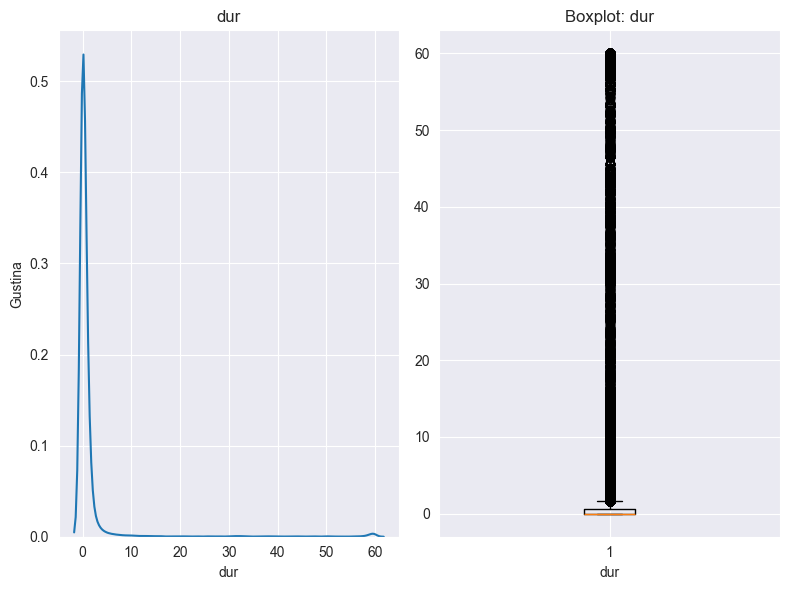

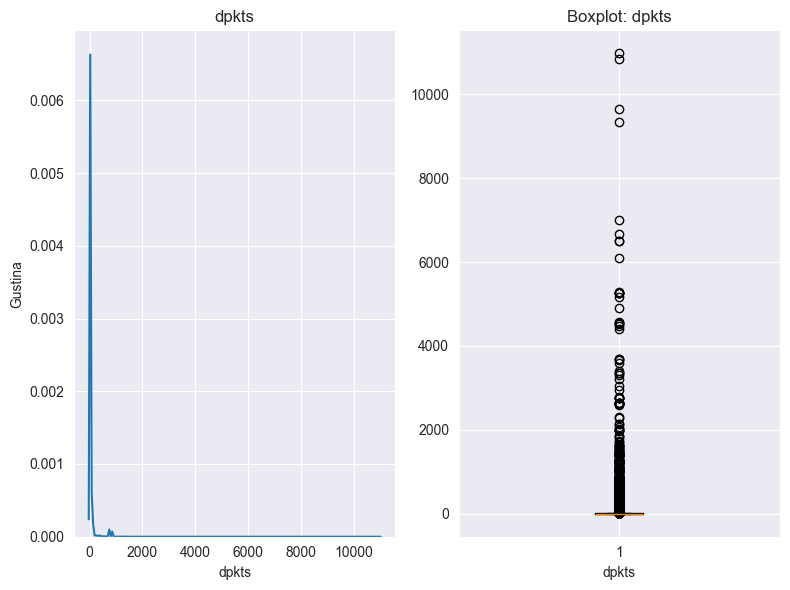

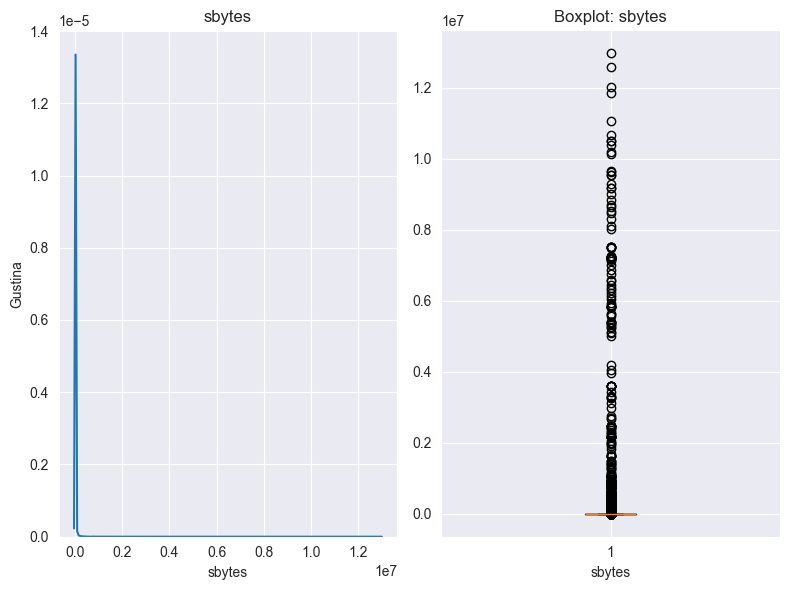

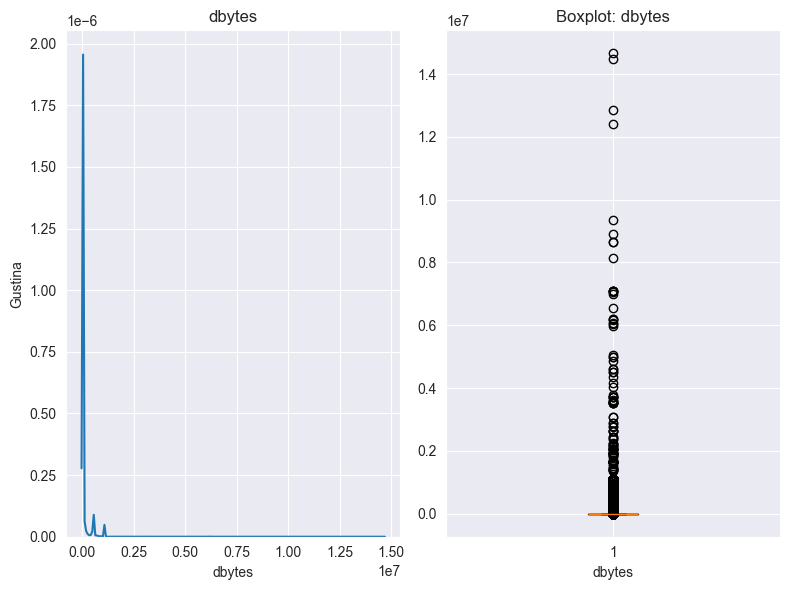

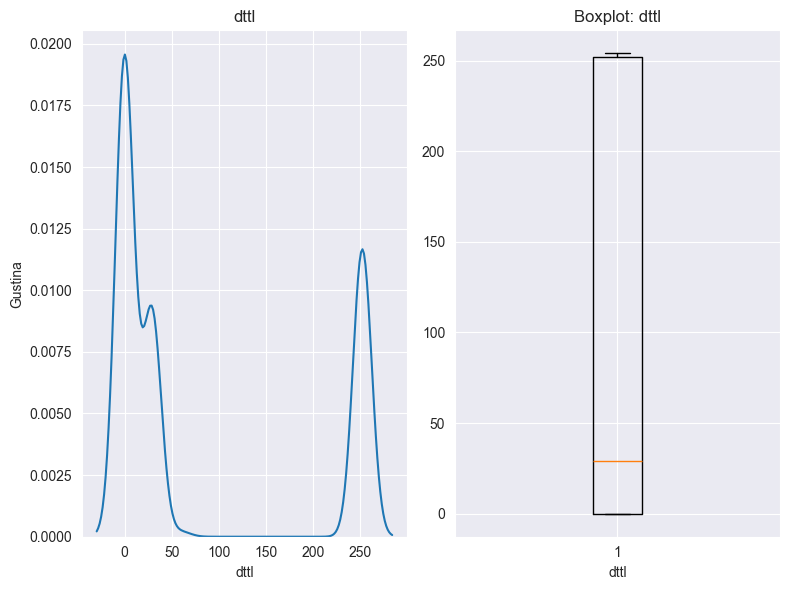

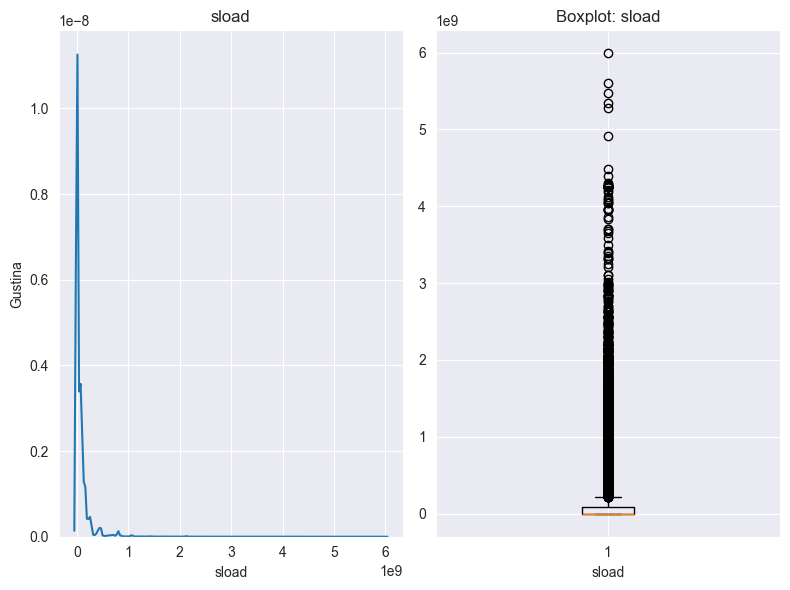

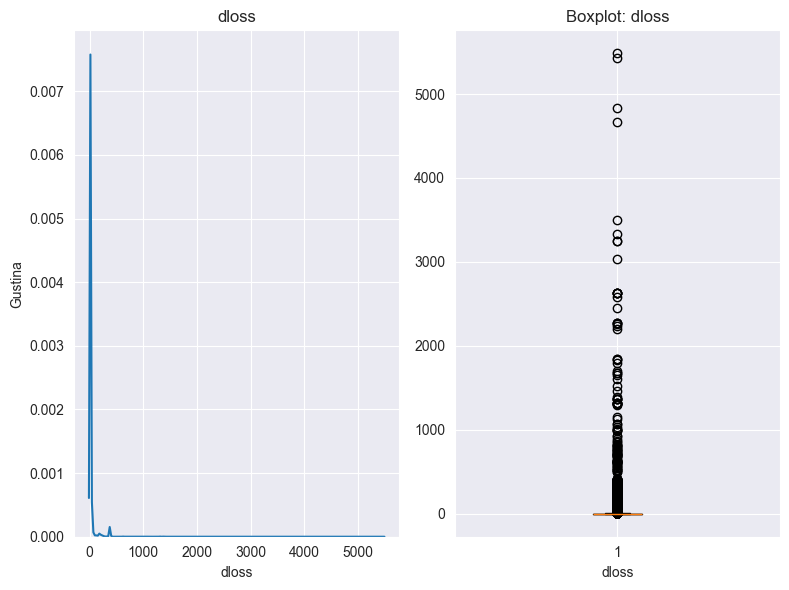

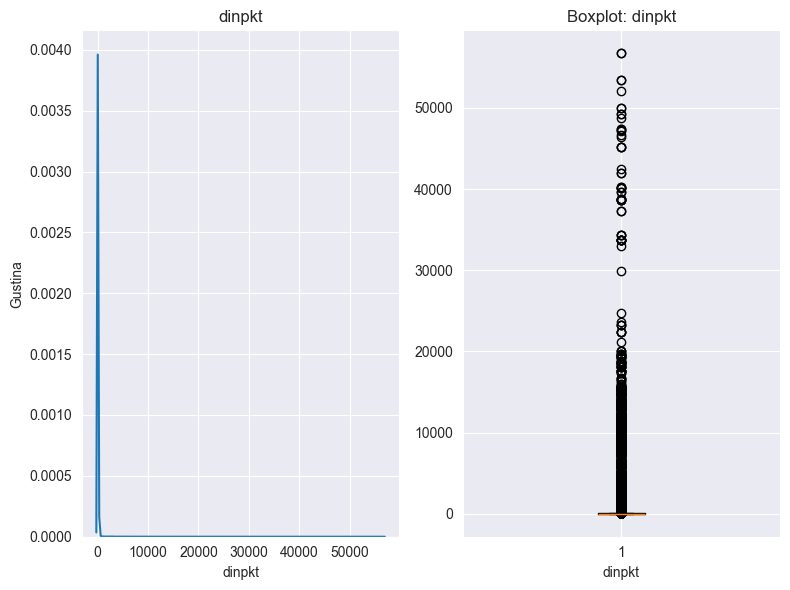

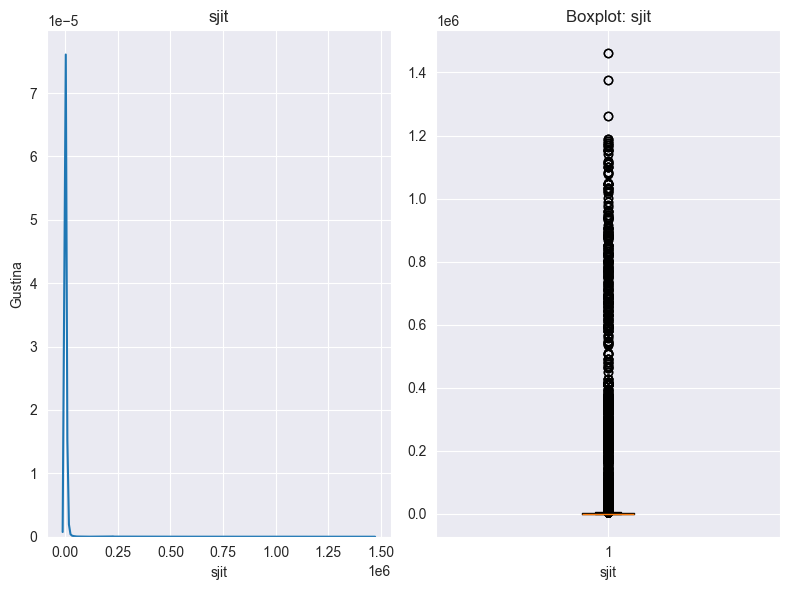

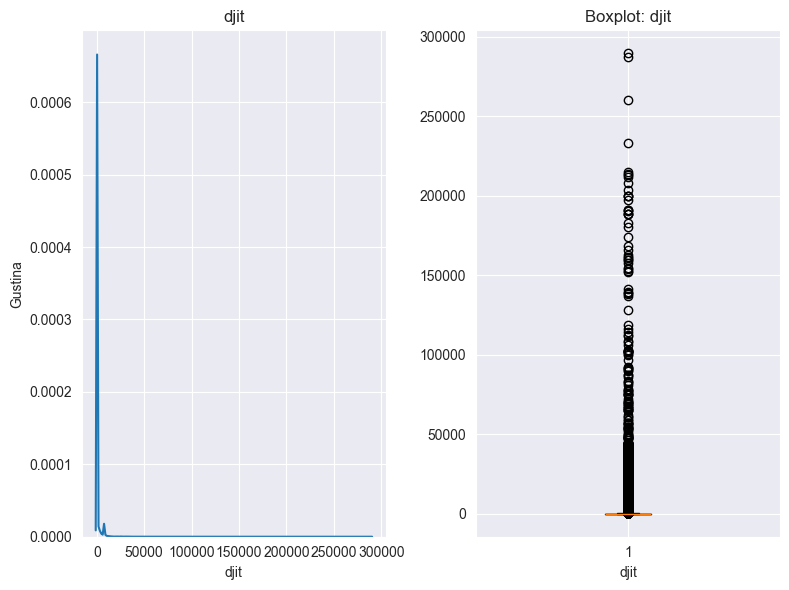

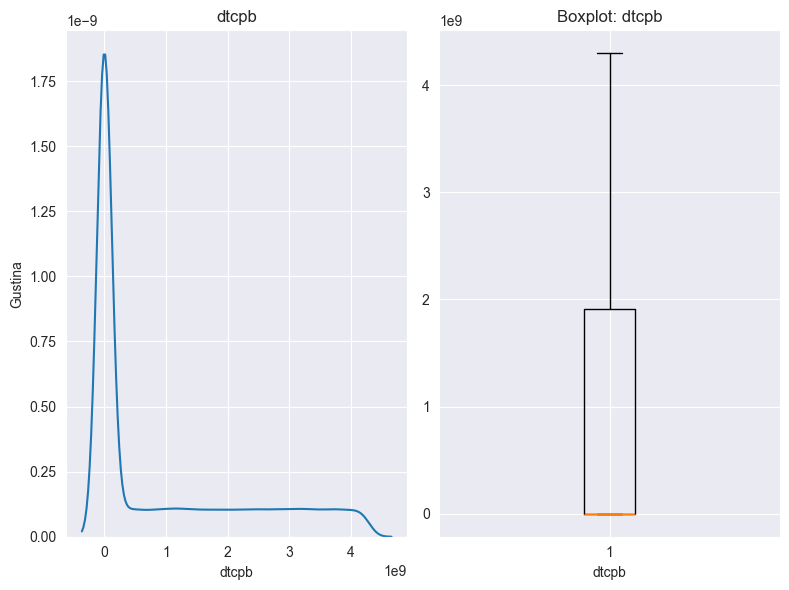

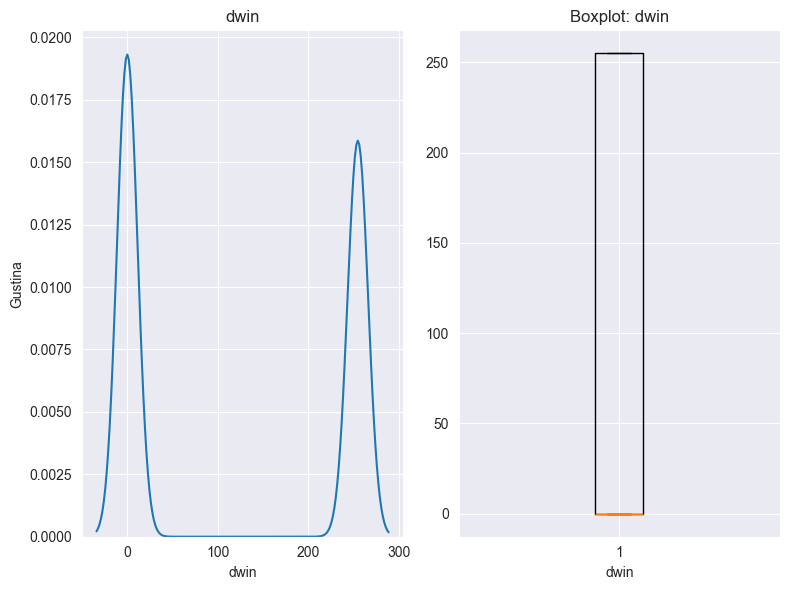

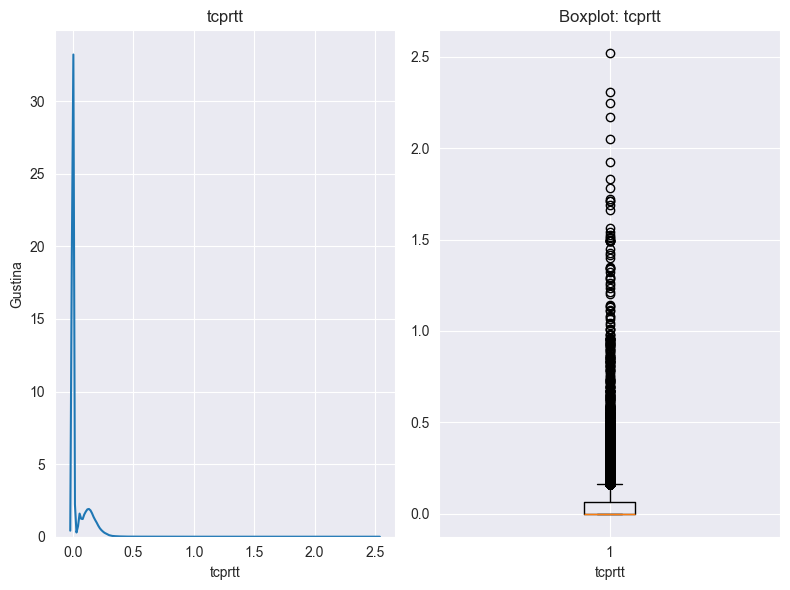

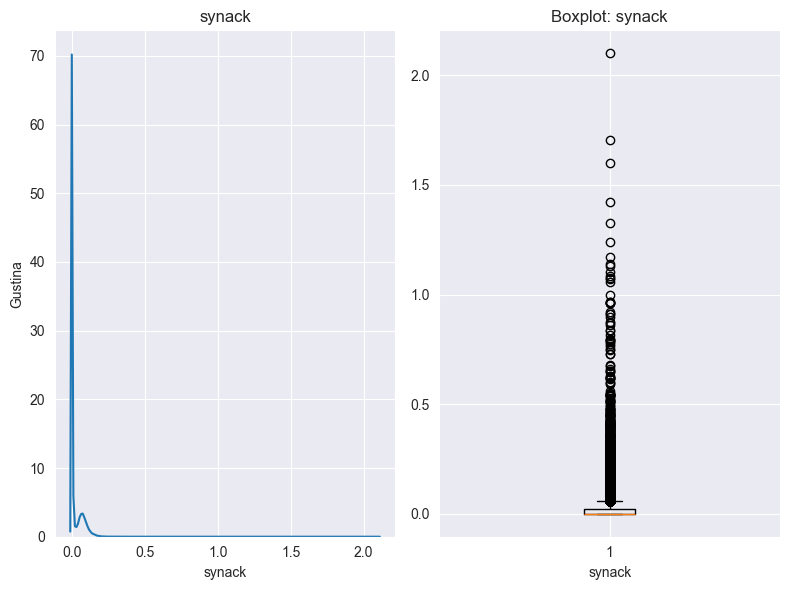

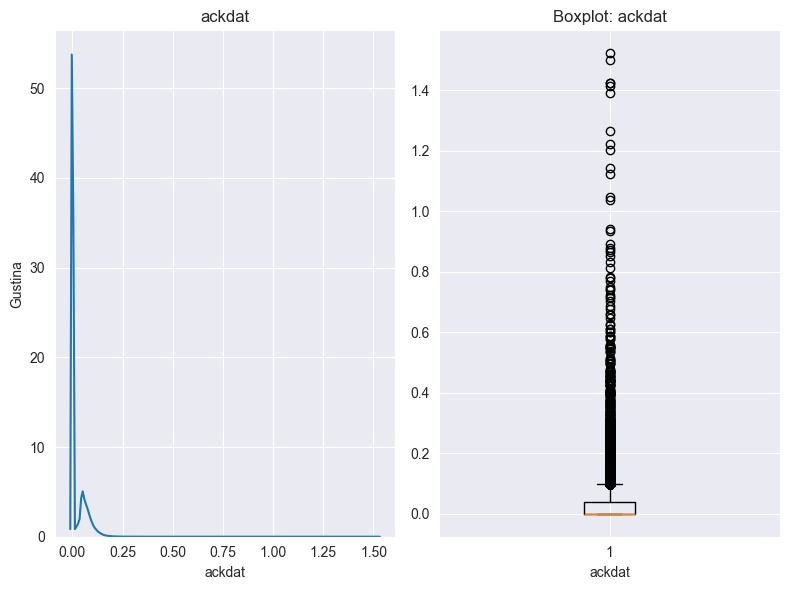

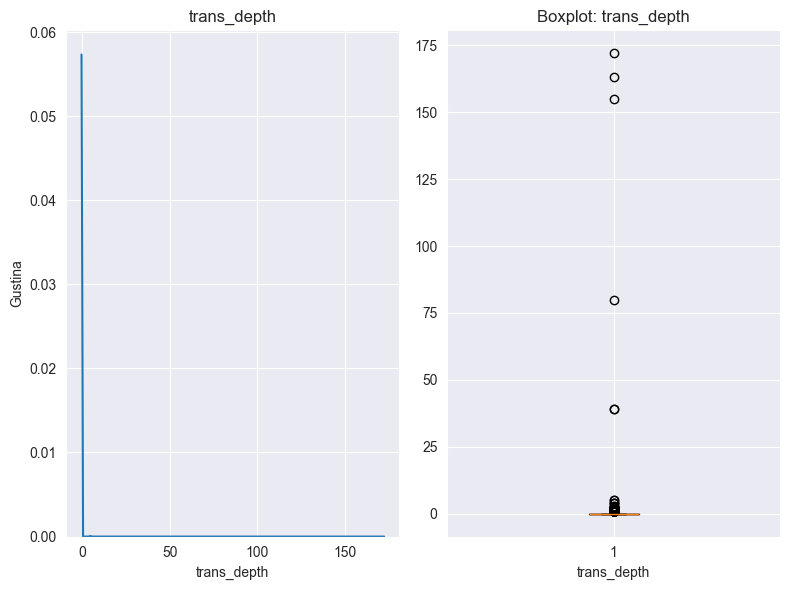

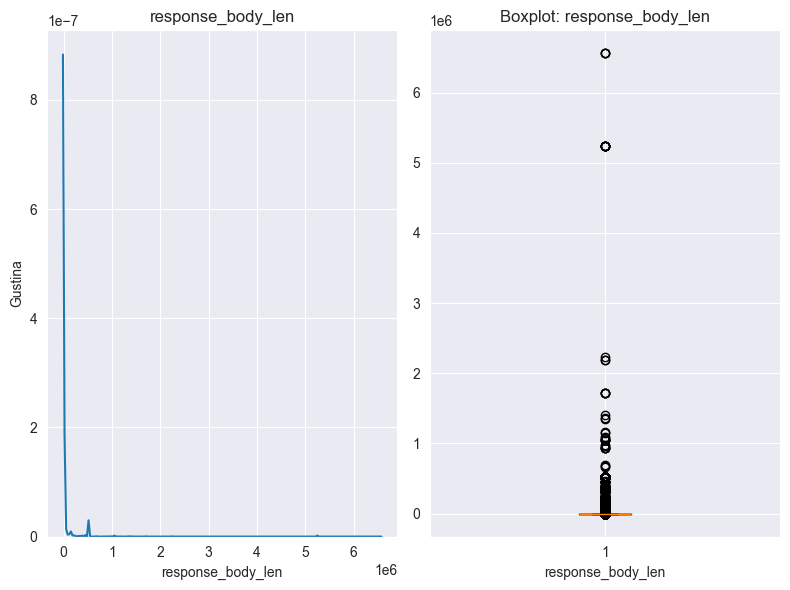

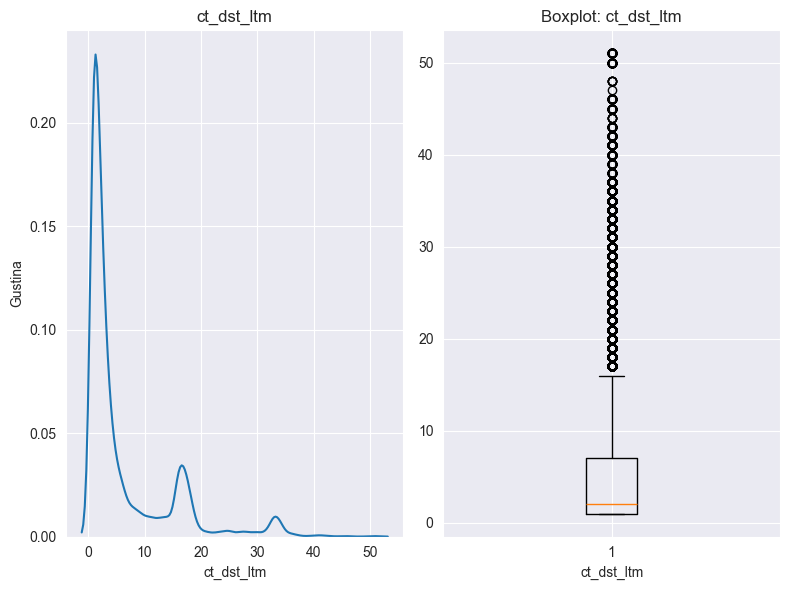

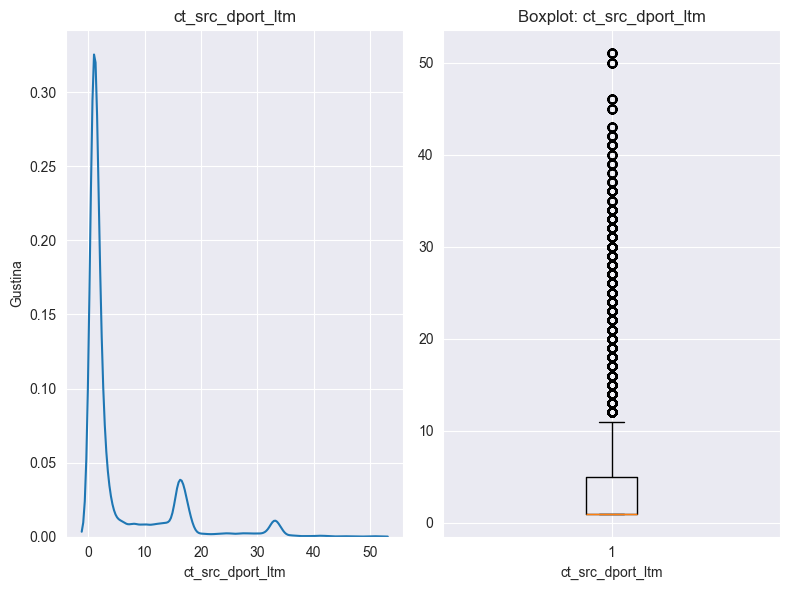

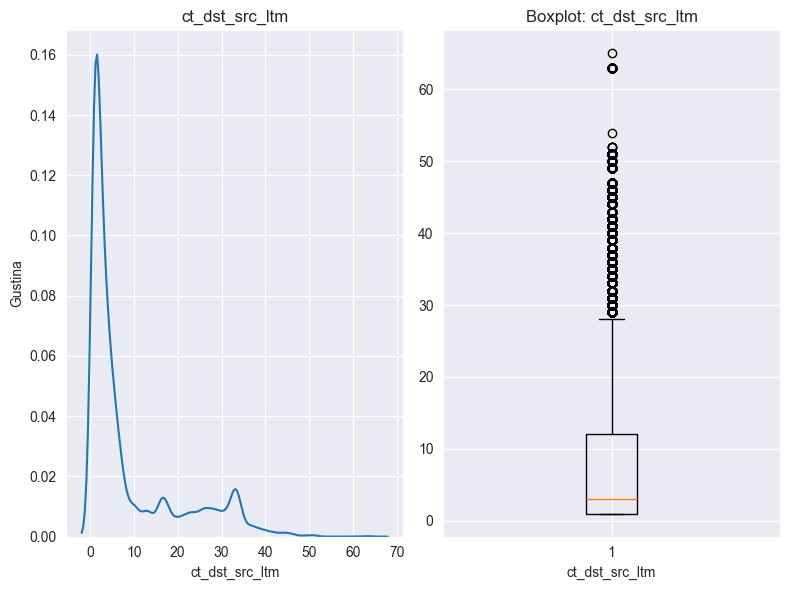

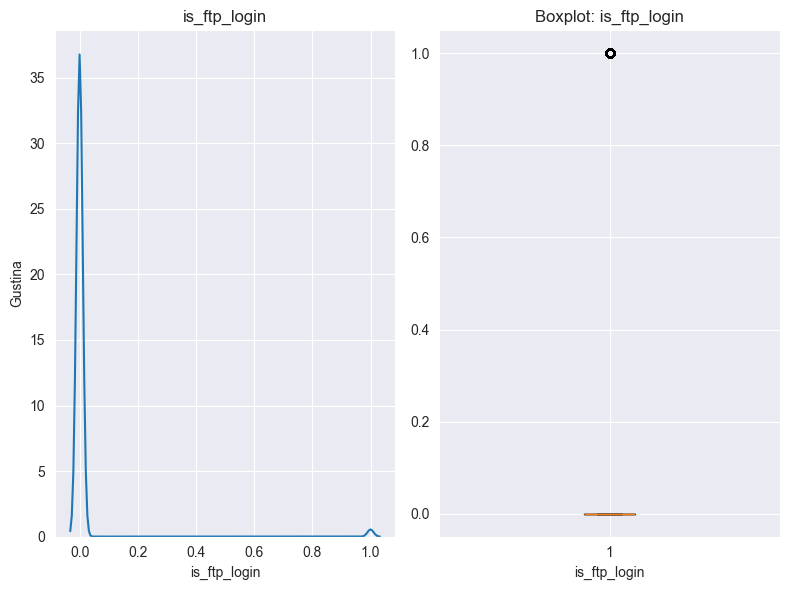

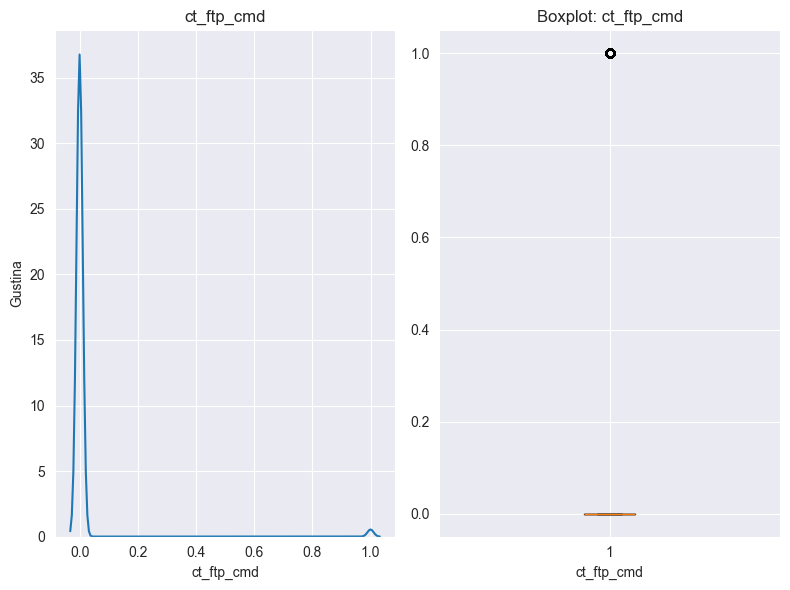

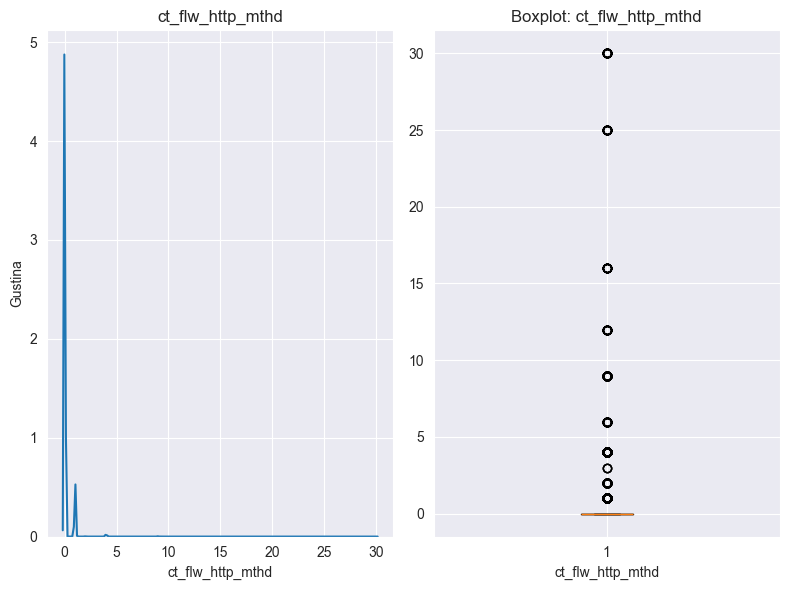

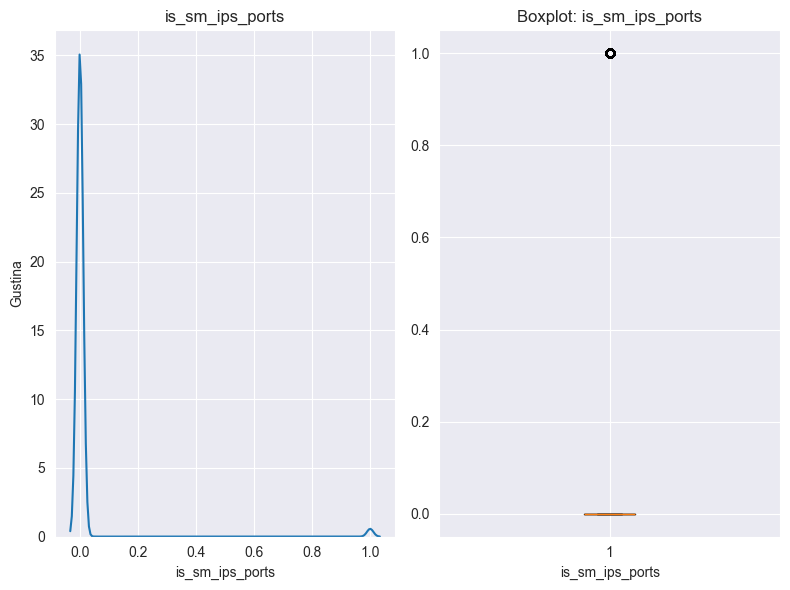

In [828]:
#Izdvajanje numeričkih kolona
numeric_cols = unsw_trset.drop(columns=['label'], errors='ignore').select_dtypes(include=[np.number])
#Funkcije gustine za svaku numericku kolonu
for col in numeric_cols:
    plt.figure(figsize=(8, 6))

    # Line (KDE) plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(unsw_trset[col], fill=False)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Gustina')

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(unsw_trset[col], vert=True)
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

Jedan red u ovim podacima se odnosi na različite atribute i karakteristike dela snimljenog saobraćaja koji je razmenjen na mreži između napadača i target mašine. Kolone koje primećujemo možemo svrstati na one koje se odnose na trajanje i protok (dur, rate, sload, dload), zatim na one koje se odnose na same podatke (spkts, dpkts, sbytes, dbytes), zaključke o tcp/ip i broju konekcija (sttl, dttl, ct_* kolone), kao i kolone koje su vezane za statistike o samim protokolima (is_ftp_login, ct_ftp_cmd, ct_flw_http_mthd, is_sm_ips_ports).

Primećena je velika asimetrija podataka kod svih kolona, a pored toga postoji i par kolona koje su bimodalne: swin, dwin i dttl. Detaljnija analiza će biti urađena na osnovu različitih attack kategorija i normalnog saobraćaja.


In [829]:
#Normal vs Attacks u našim podacima
print(f"\nNormalan saobraćaj: {(unsw_trset['label'] == 0).sum():,}")
print(f"Attack saobraćaj: {(unsw_trset['label'] == 1).sum():,}")
print(f"Attack procenat: {(unsw_trset['label'] == 1).mean()*100:.2f}%")


Normalan saobraćaj: 55,997
Attack saobraćaj: 119,321
Attack procenat: 68.06%


*Poređenje normalnog i attack saobraćaja*

In [830]:
#Normalan saobraćaj na mreži
normal_nt = unsw_trset[unsw_trset['label'] == 0]
print(f"Ukupan broj rekorda koji se odnose na normalan saobraćaj: {len(normal_nt):,}")
print(f"Procenat normalnog saobraćaja: {(len(normal_nt)/len(unsw_trset))*100:.1f}%")

#bitne kolone
main_columns = ['proto', 'state', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']

normal_sample = normal_nt.sample(n=10, random_state=42)[main_columns]
print(f"Uzorak 10 normalnih rekorda:")
display(normal_sample)

Ukupan broj rekorda koji se odnose na normalan saobraćaj: 55,997
Procenat normalnog saobraćaja: 31.9%
Uzorak 10 normalnih rekorda:


proto state       dur  spkts  dpkts  sbytes  dbytes           rate
95730   tcp   FIN  0.661656     10     10     804    1330      28.715827
45503   tcp   FIN  0.399579     10      6    2516     268      37.539511
24527   udp   CON  0.001018      2      2     146     178    2946.954953
13713   tcp   FIN  0.015935     48     50    2974   30506    6087.229357
75475   udp   INT  0.000004      2      0     104       0  250000.000600
98536   tcp   FIN  0.450403     10      8     792    1120      37.743976
23038   tcp   FIN  0.004140     26     24    2262    2478   11835.749200
30531   tcp   FIN  0.004789     18     18    3960    2456    7308.415253
74777   tcp   FIN  0.270394     10      6     542     268      55.474604
14644   tcp   FIN  0.006380     18     18    4528    2456    5485.893286

In [831]:
#Maliciozan saobraćaj na mreži

malicious_nt = unsw_trset[unsw_trset['label']==1]
print(f"Ukupan broj rekorda koji se odnose na maliciozan saobraćaj: {len(malicious_nt):,}")
print(f"Procenat malicioznog saobraćaja: {(len(malicious_nt)/len(unsw_trset))*100:.1f}%")

mal_sample = malicious_nt.sample(n=10)[main_columns]
print("Uzorak 10 malicioznih rekorda:")
display(mal_sample)

Ukupan broj rekorda koji se odnose na maliciozan saobraćaj: 119,321
Procenat malicioznog saobraćaja: 68.1%
Uzorak 10 malicioznih rekorda:


proto state       dur  spkts  dpkts  sbytes  dbytes           rate
78315    tcp   FIN  1.224840     12     20    1278   16810      25.309427
81895   sctp   INT  0.000006      2      0     104       0  166666.660800
163347   udp   INT  0.000008      2      0     114       0  125000.000300
131199   tcp   FIN  0.305549     10      6     812     268      49.091963
103772  unas   INT  0.000003      2      0     200       0  333333.321500
95804    tcp   FIN  0.401201     10      6     484     268      37.387742
87762   unas   INT  0.000006      2      0     200       0  166666.660800
171252   udp   INT  0.000009      2      0     168       0  111111.107200
103484   tcp   FIN  1.539348     10      8     564     354      11.043637
113081   tcp   FIN  3.048519     20     22     978    4146      13.449154

In [832]:
# Direktno poređenje: Normal vs Attack
print("KARAKTERISTIKE NORMALNOG SAOBRAĆAJA:")
print("-" * 35)
normal_stats = normal_nt[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']].describe()
print(normal_stats)

print("\nKARAKTERISTIKE MALICIOZNOG SAOBRAĆAJA:")
print("-" * 35)
attack_stats = malicious_nt[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']].describe()
print(attack_stats)

KARAKTERISTIKE NORMALNOG SAOBRAĆAJA:
-----------------------------------
                dur         spkts         dpkts         sbytes        dbytes  \
count  55997.000000  55997.000000  55997.000000   55997.000000  5.599700e+04   
mean       1.017179     30.725967     38.058521    4105.858600  3.105104e+04   
std        4.859370     57.345539    105.775985   11348.336246  1.399948e+05   
min        0.000000      1.000000      0.000000      46.000000  0.000000e+00   
25%        0.001718      4.000000      2.000000     424.000000  1.780000e+02   
50%        0.038593     12.000000     10.000000    1470.000000  1.112000e+03   
75%        0.639813     40.000000     40.000000    3406.000000  1.016800e+04   
max       59.999989    656.000000   1716.000000  338718.000000  2.249492e+06   

               rate  
count  5.599700e+04  
mean   1.380005e+04  
std    6.803314e+04  
min    0.000000e+00  
25%    3.073089e+01  
50%    1.382495e+03  
75%    3.177707e+03  
max    1.000000e+06  

KARAKTE

duration, dest packets, rate median se dosta razlikuju
 - Normalan saobraćaj zahteva vreme za obradu i odgovor, dok alati za napade često šalju brze zahteve koji prave veoma kratke veze.
 - Normalan saobraćaj ide oko 1.382 bajta u sekundi, dok je saobraćaj napada 80 puta brži — oko 111.111 bajta u sekundi.
   Tolika brzina pokazuje da su u pitanju automatizovani napadi, što pomaže u njihovoj detekciji.
 - Normalan saobraćaj ima aktivnu dvosmernu komunikaciju sa oko 10 paketa i 1.112 bajta podataka u odgovoru. Napadi uglavnom imaju jednosmerni tok, bez povratnih paketa i       podataka.

## Analiza na osnovu tipa napada

In [833]:
#util funkcija za prikaz fja gustine za dva tipa napada (korišćena pri poređenju - za donošenje zaključaka)
def plot_kde_for_attacks(df, attack1, attack2):
    filtered_df = df[df['attack_cat'].isin([attack1, attack2])]

    numeric_cols = filtered_df.select_dtypes(include='number').columns


    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(data=filtered_df, x=col, hue='attack_cat', fill=True,
                    common_norm=False, alpha=0.4)
        plt.title(f'Funkcija gustine (KDE) za "{col}" — {attack1} i {attack2}')
        plt.xlabel(col)
        plt.ylabel('Gustina')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

**Mali overview tipova napada u našem datasetu**

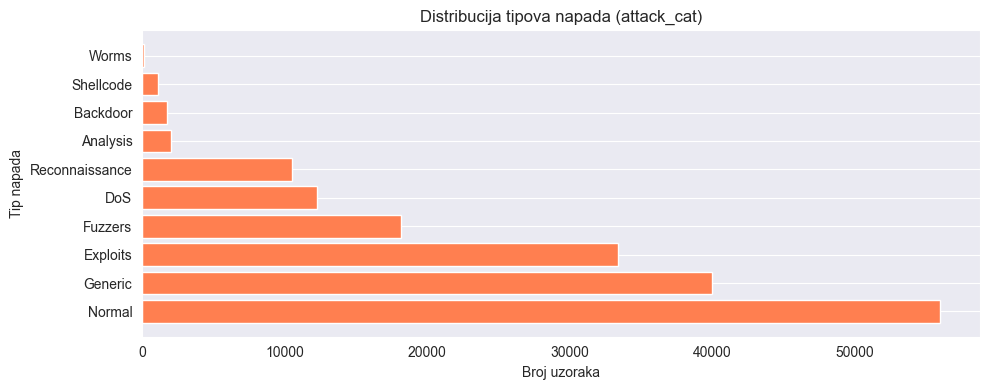

Broj uzoraka i procenti po tipu napada:
Normal: 55997 (31.94%)
Generic: 40000 (22.82%)
Exploits: 33377 (19.04%)
Fuzzers: 18180 (10.37%)
DoS: 12264 (7.00%)
Reconnaissance: 10491 (5.98%)
Analysis: 2000 (1.14%)
Backdoor: 1746 (1.00%)
Shellcode: 1133 (0.65%)
Worms: 130 (0.07%)


In [834]:
attack_counts = unsw_trset['attack_cat'].value_counts()
total = attack_counts.sum()

plt.figure(figsize=(10, 4))
plt.barh(attack_counts.index, attack_counts.values, color='coral')
plt.xlabel("Broj uzoraka")
plt.ylabel("Tip napada")
plt.title("Distribucija tipova napada (attack_cat)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


print("Broj uzoraka i procenti po tipu napada:")
for attack, count in attack_counts.items():
    percent = count / total * 100
    print(f"{attack}: {count} ({percent:.2f}%)")

### Sređivanje outlier-a

Prvo što ćemo uraditi je sređivanje outliera pomoću sledeće tehnike - https://www.kaggle.com/code/carlkirstein/unsw-nb15-modelling-97-7#Drop-irrelevant-or-excess-feastures

Ekstremne vrednosti u podacima se ograničavaju kako bi se smanjila asimetrija (skewness) u distribucijama pojedinih karakteristika. Ova metoda se primenjuje samo na one numeričke kolone kod kojih je maksimalna vrednost veća od deset puta mediane — u tim slučajevima vrednosti veće od 95. procenta se zamenjuju upravo tom granicom (95. procentom). Međutim, ako je 95. procenat veoma blizu maksimalne vrednosti, pretpostavlja se da "rep" distribucije sadrži značajne informacije i tada se ograničavanje ne vrši. Na taj način se izbegava prekomerno skraćivanje raspodela koje imaju dve izražene grupe vrednosti (bimodalne) ili koje generalno sadrže manje vrednosti.

In [835]:
def winsorize(df, cols):
    for feature in cols:
        if df[feature].max() > 10 * df[feature].median() and df[feature].max() > 10:
            q95 = df[feature].quantile(0.95)
            df[feature] = np.where(
                df[feature] > q95,
                q95,
                df[feature]
            )

In [836]:
eda_df = unsw_trset.copy() # pravimo kopiju podataka koju ćemo koristiti zbog winsorize pre vizuelizacije
eda_df.describe()

dur          spkts          dpkts        sbytes  \
count  175318.000000  175318.000000  175318.000000  1.753180e+05   
mean        1.358387      20.299199      18.970094  8.845889e+03   
std         6.477081     136.896532     110.265455  1.747771e+05   
min         0.000000       1.000000       0.000000  4.600000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001578       2.000000       2.000000  4.240000e+02   
75%         0.667792      12.000000      10.000000  1.418000e+03   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753180e+05  1.753180e+05  175318.000000  175318.000000  1.753180e+05   
mean   1.493074e+04  9.541870e+04     179.557296      79.590932  7.346367e+07   
std    1.436636e+05  1.654082e+05     102.938647     110.498475  1.883679e+08   
min    0.000000e+00  0.000000e+00       0.000000       0.000000  0.000000e+00   
25%    0.000000e+00  3.278840e+01      62.000000       0.000000  1.306291e+04   
50%    1.640000e+02  3.229279e+03     254.000000      29.000000  8.802024e+05   
75%    1.102000e+03  1.250000e+05     254.000000     252.000000  8.888889e+07   
max    1.465555e+07  1.000000e+06     255.000000     254.000000  5.988000e+09   

              dload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count  1.753180e+05  ...     175318.000000     175318.000000   175318.000000   
mean   6.712931e+05  ...          5.384016          4.206585        8.730689   
std    2.421459e+06  ...          8.047522          5.783891       10.956672   
min    0.000000e+00  ...          1.000000          1.000000        1.000000   
25%    0.000000e+00  ...          1.000000          1.000000        1.000000   
50%    1.444810e+03  ...          1.000000          1.000000        3.000000   
75%    2.790154e+04  ...          5.000000          3.000000       12.000000   
max    2.242273e+07  ...         51.000000         46.000000       65.000000   

        is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd     ct_src_ltm  \
count  175318.000000  175318.000000     175318.000000  175318.000000   
mean        0.014516       0.014516          0.133084       6.956217   
std         0.119607       0.119607          0.701252       8.321909   
min         0.000000       0.000000          0.000000       1.000000   
25%         0.000000       0.000000          0.000000       2.000000   
50%         0.000000       0.000000          0.000000       3.000000   
75%         0.000000       0.000000          0.000000       9.000000   
max         1.000000       1.000000         30.000000      60.000000   

          ct_srv_dst  is_sm_ips_ports          label  
count  175318.000000    175318.000000  175318.000000  
mean        9.101672         0.015754       0.680598  
std        10.757357         0.124524       0.466246  
min         1.000000         0.000000       0.000000  
25%         2.000000         0.000000       0.000000  
50%         4.000000         0.000000       1.000000  
75%        12.000000         0.000000       1.000000  
max        62.000000         1.000000       1.000000  

[8 rows x 40 columns]

In [837]:
winsorize(eda_df,numeric_cols)
eda_df.describe()

dur          spkts         dpkts         sbytes  \
count  175318.000000  175318.000000  175318.00000  175318.000000   
mean        0.466797      12.616851      10.00612    1697.397643   
std         0.815625      17.574869      16.84137    3267.001422   
min         0.000000       1.000000       0.00000      46.000000   
25%         0.000008       2.000000       0.00000     114.000000   
50%         0.001578       2.000000       2.00000     424.000000   
75%         0.667792      12.000000      10.00000    1418.000000   
max         3.077316      64.000000      62.00000   13662.000000   

              dbytes           rate           sttl           dttl  \
count  175318.000000  175318.000000  175318.000000  175318.000000   
mean     3648.554661   80967.817347     179.557296      79.590932   
std      9676.033068  108510.553552     102.938647     110.498475   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      32.788405      62.000000       0.000000   
50%       164.000000    3229.278890     254.000000      29.000000   
75%      1102.000000  125000.000300     254.000000     252.000000   
max     39076.000000  333333.321500     255.000000     254.000000   

              sload         dload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
count  1.753180e+05  1.753180e+05  ...     175318.000000     175318.000000   
mean   5.327724e+07  3.655643e+05  ...          4.903678          4.145547   
std    7.771404e+07  1.011814e+06  ...          6.545305          5.589479   
min    0.000000e+00  0.000000e+00  ...          1.000000          1.000000   
25%    1.306291e+04  0.000000e+00  ...          1.000000          1.000000   
50%    8.802024e+05  1.444810e+03  ...          1.000000          1.000000   
75%    8.888889e+07  2.790154e+04  ...          5.000000          3.000000   
max    2.666667e+08  4.071727e+06  ...         22.000000         17.000000   

       ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd  \
count   175318.000000  175318.000000  175318.000000     175318.000000   
mean         8.506388       0.014516       0.014516          0.101758   
std         10.339595       0.119607       0.119607          0.302331   
min          1.000000       0.000000       0.000000          0.000000   
25%          1.000000       0.000000       0.000000          0.000000   
50%          3.000000       0.000000       0.000000          0.000000   
75%         12.000000       0.000000       0.000000          0.000000   
max         33.000000       1.000000       1.000000          1.000000   

          ct_src_ltm     ct_srv_dst  is_sm_ips_ports          label  
count  175318.000000  175318.000000    175318.000000  175318.000000  
mean        6.625173       8.883646         0.015754       0.680598  
std         7.308161      10.154455         0.124524       0.466246  
min         1.000000       1.000000         0.000000       0.000000  
25%         2.000000       2.000000         0.000000       0.000000  
50%         3.000000       4.000000         0.000000       1.000000  
75%         9.000000      12.000000         0.000000       1.000000  
max        26.000000      33.000000         1.000000       1.000000  

[8 rows x 40 columns]

Možemo videti da su max vrednosti u mnogim kolonama (npr. dur, spkts, sbytes, dbytes, sload) drastično smanjene jer su ekstremne vrednosti odsečene na 95. percentilu.

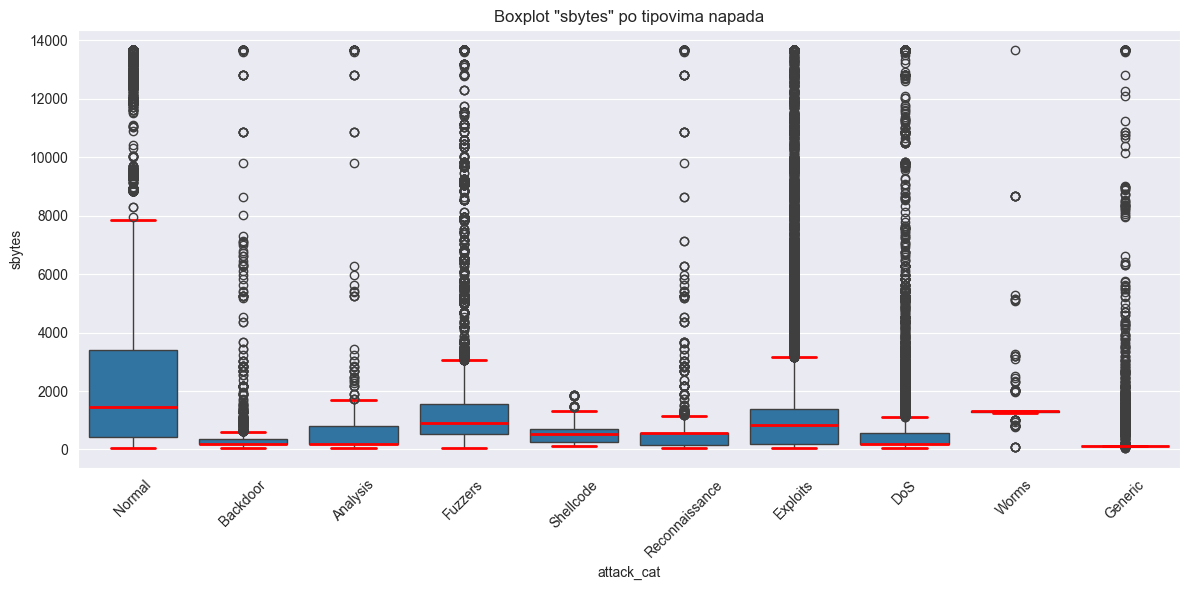

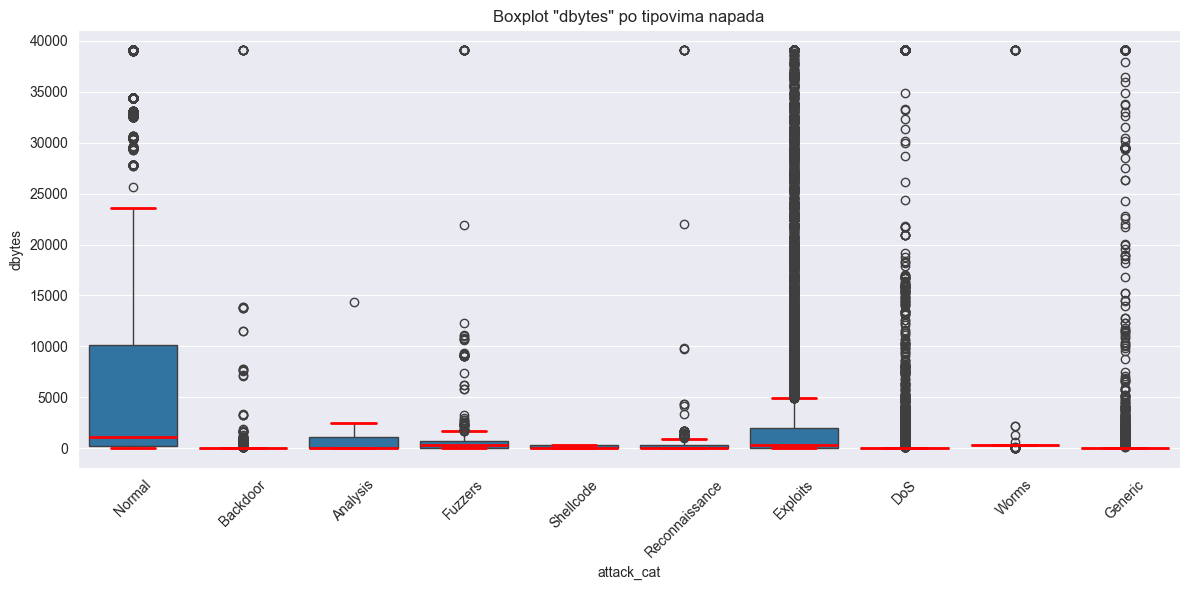

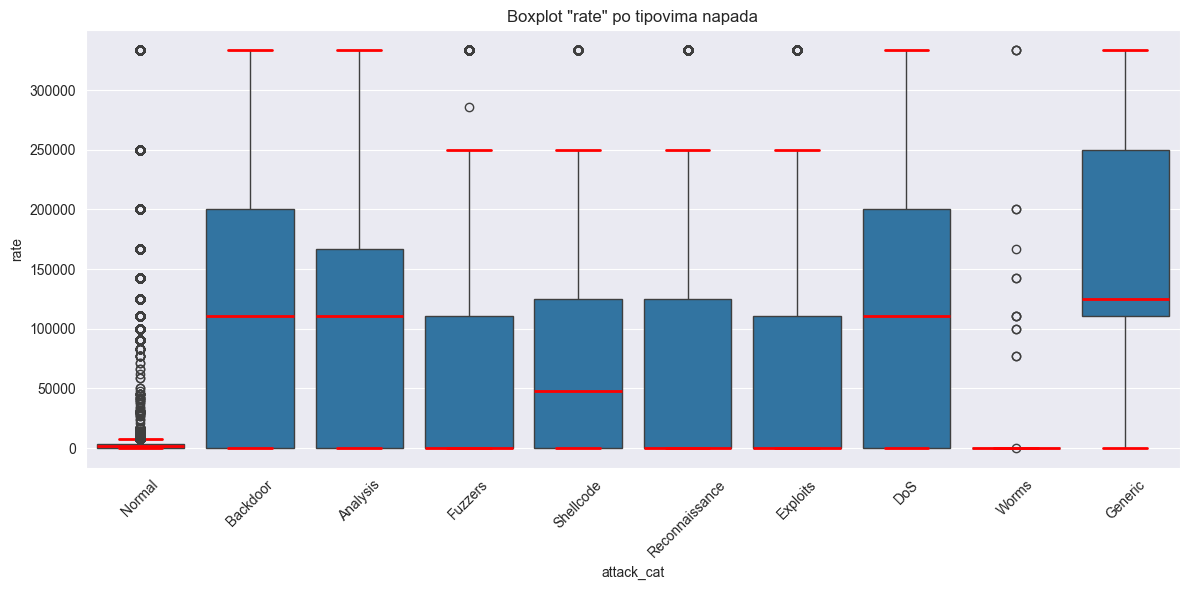

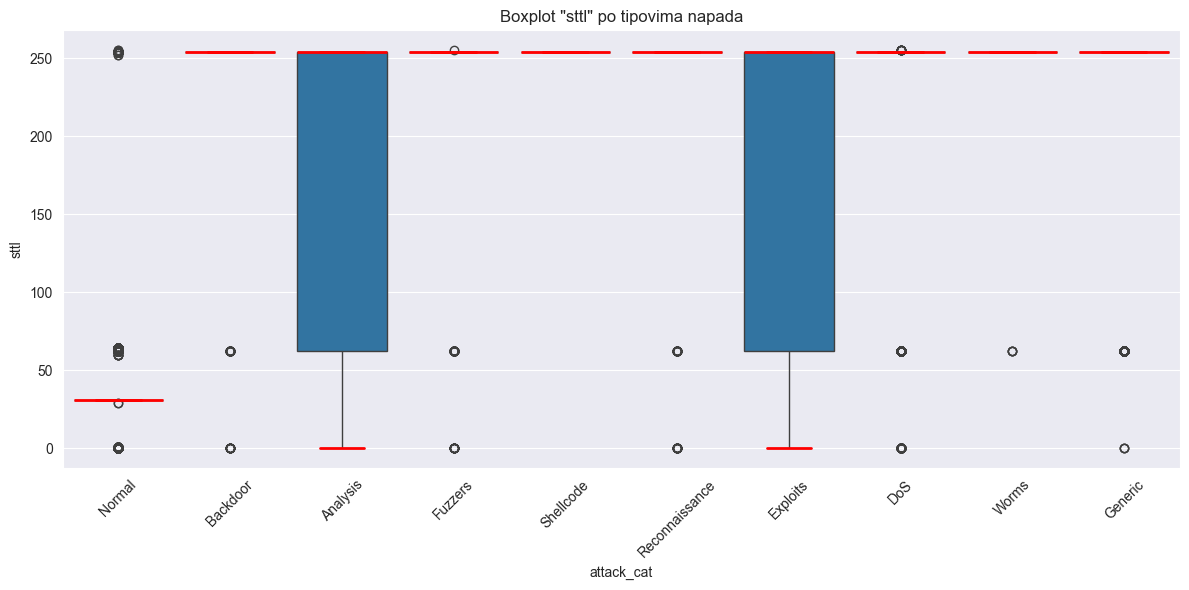

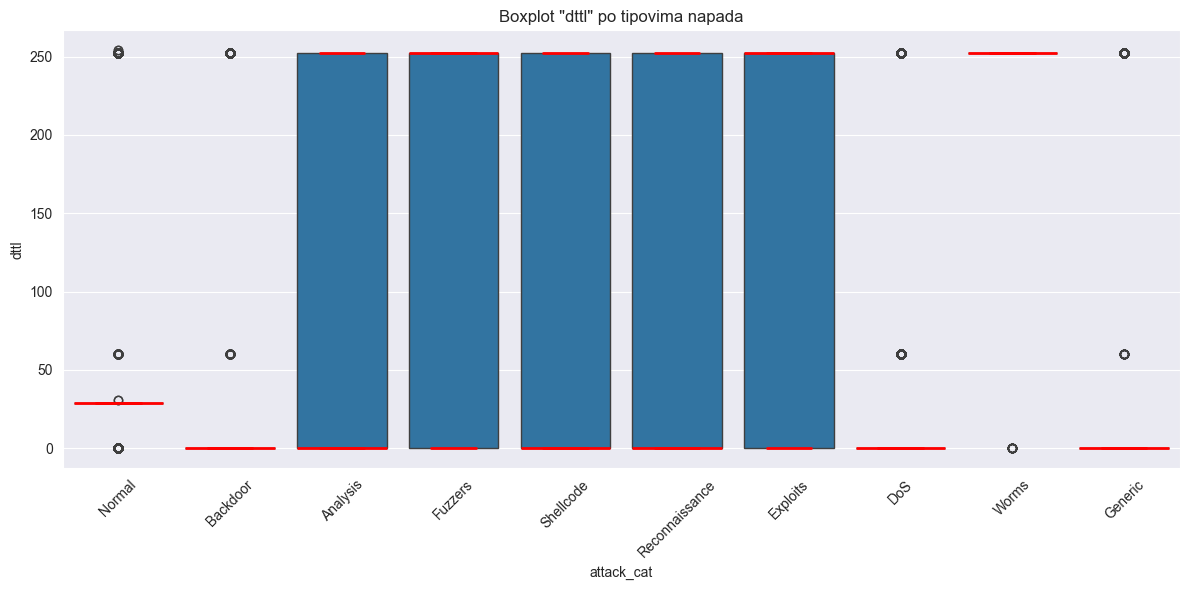

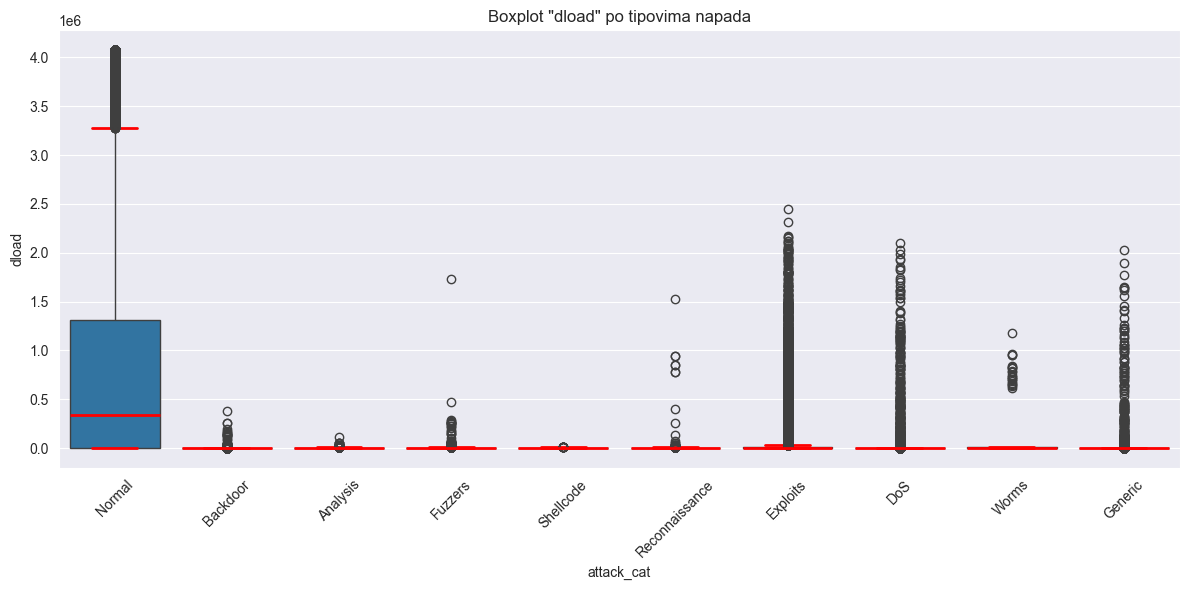

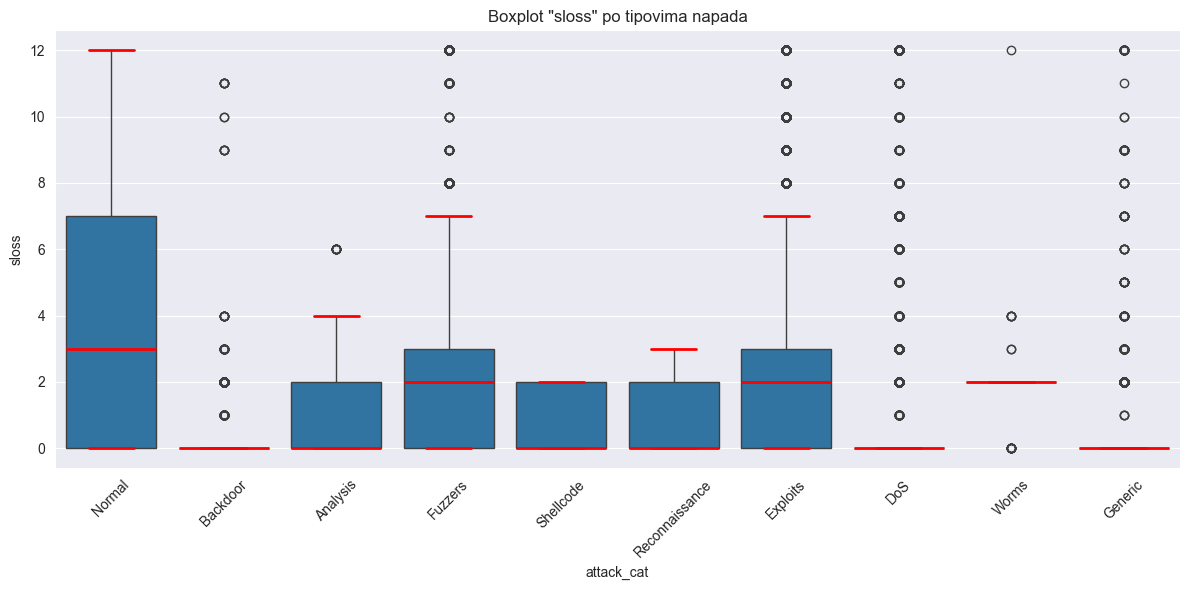

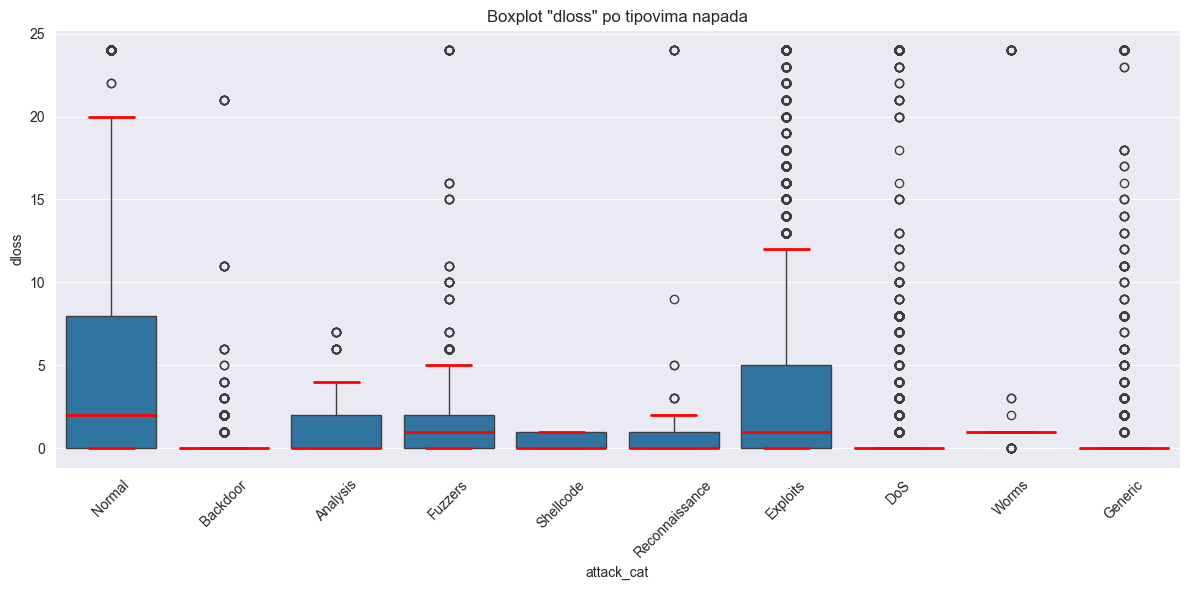

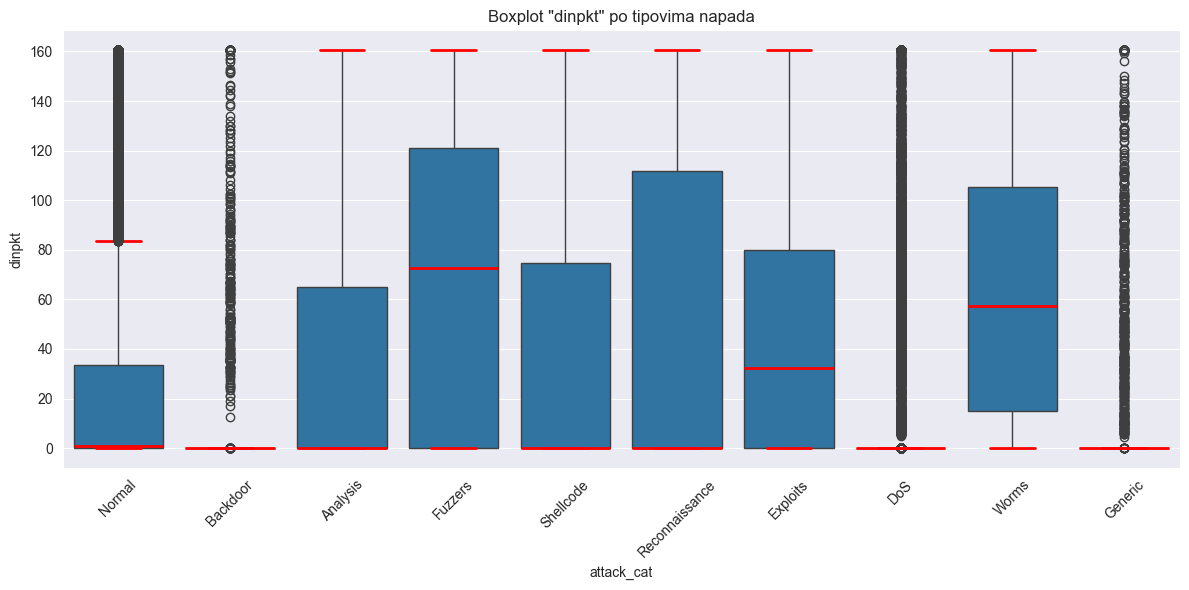

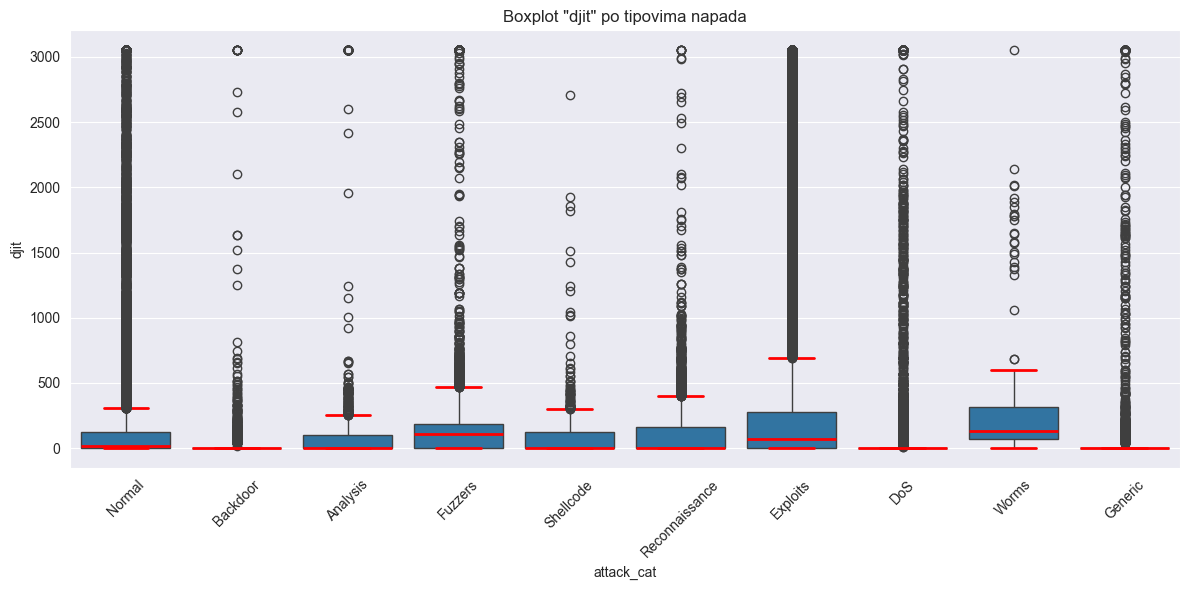

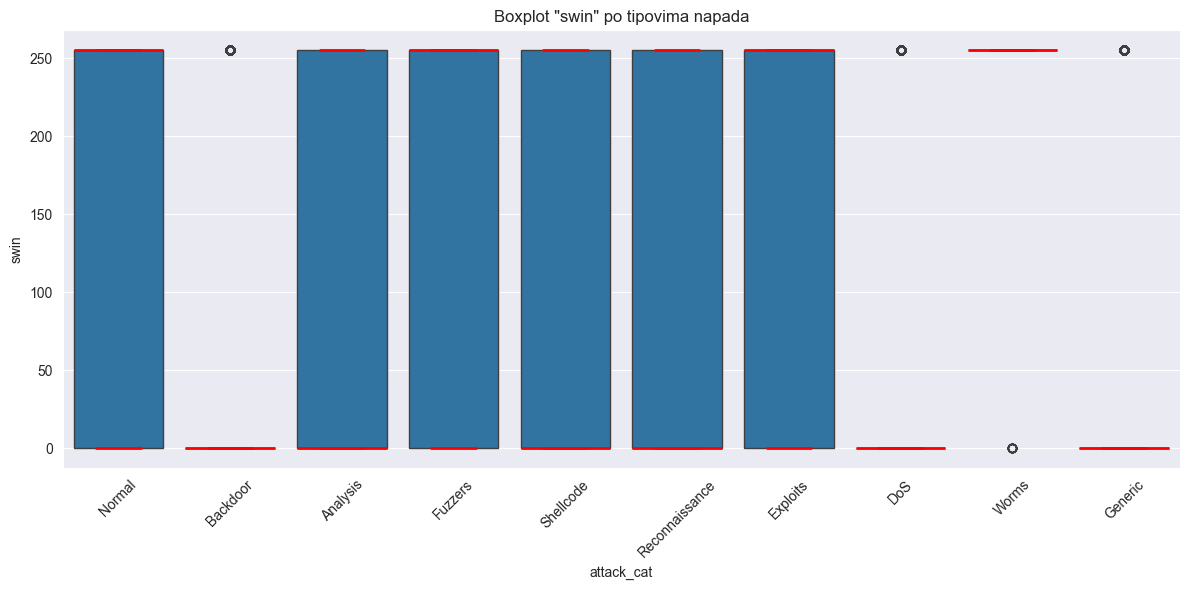

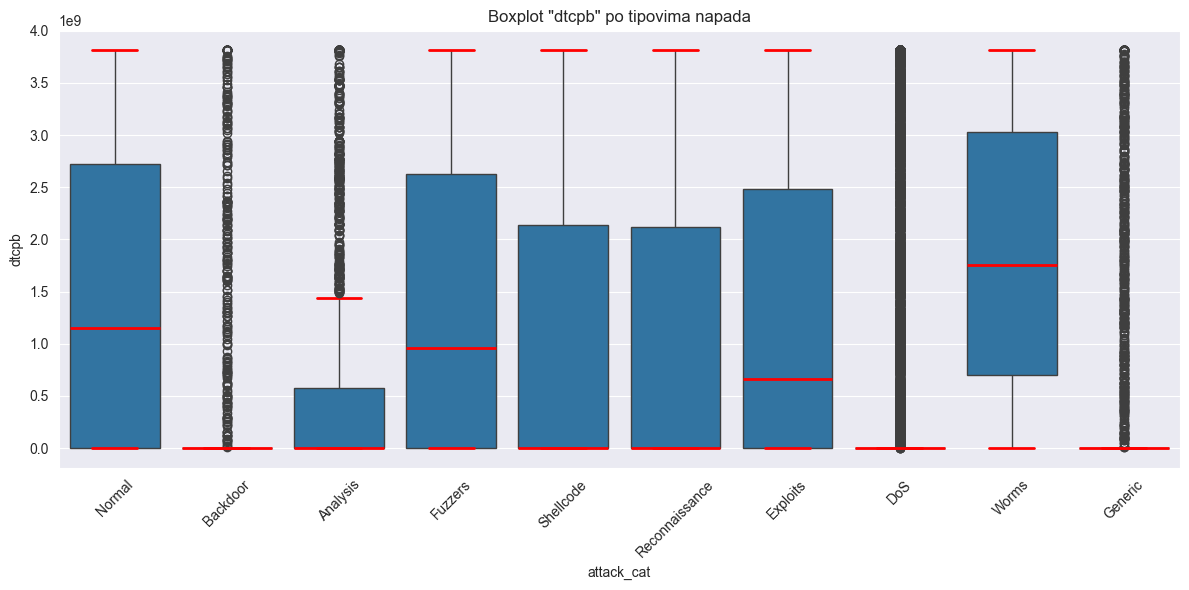

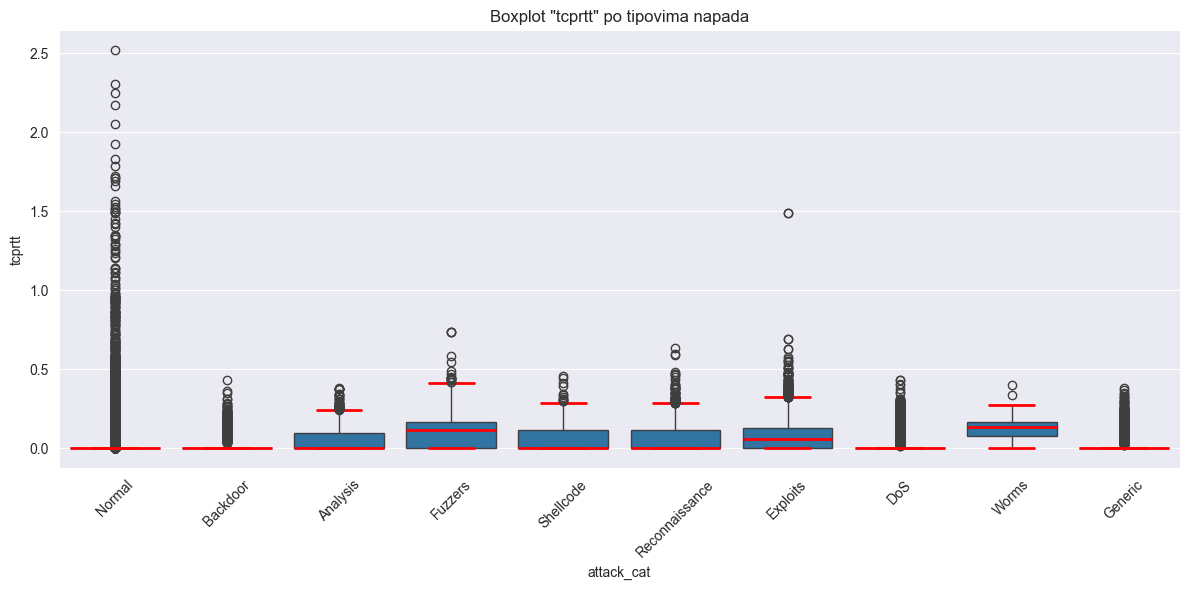

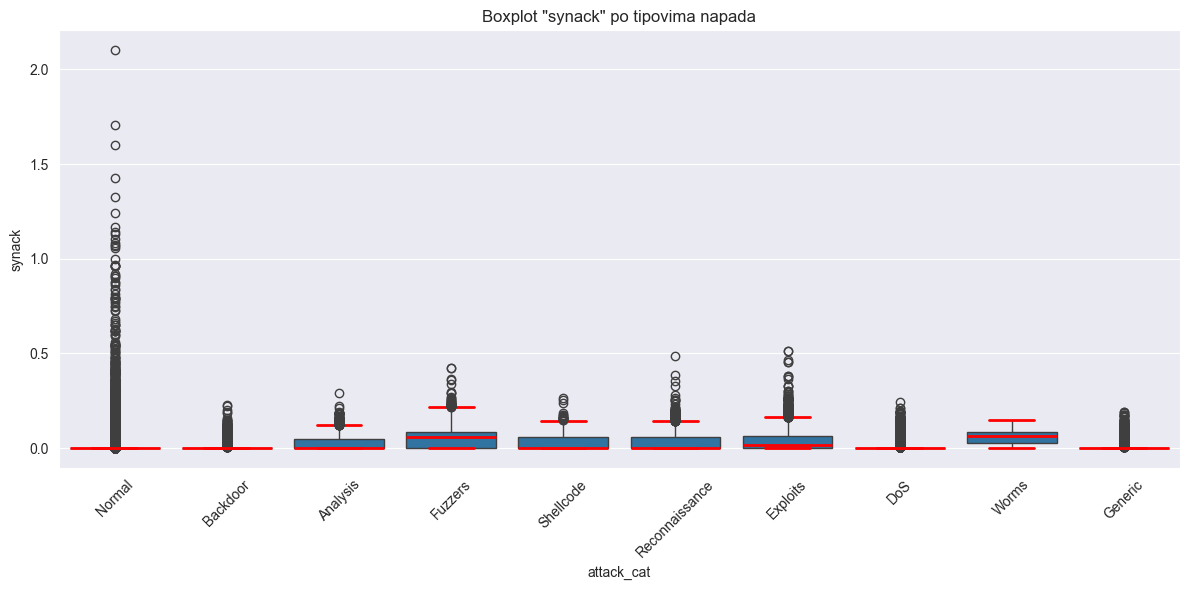

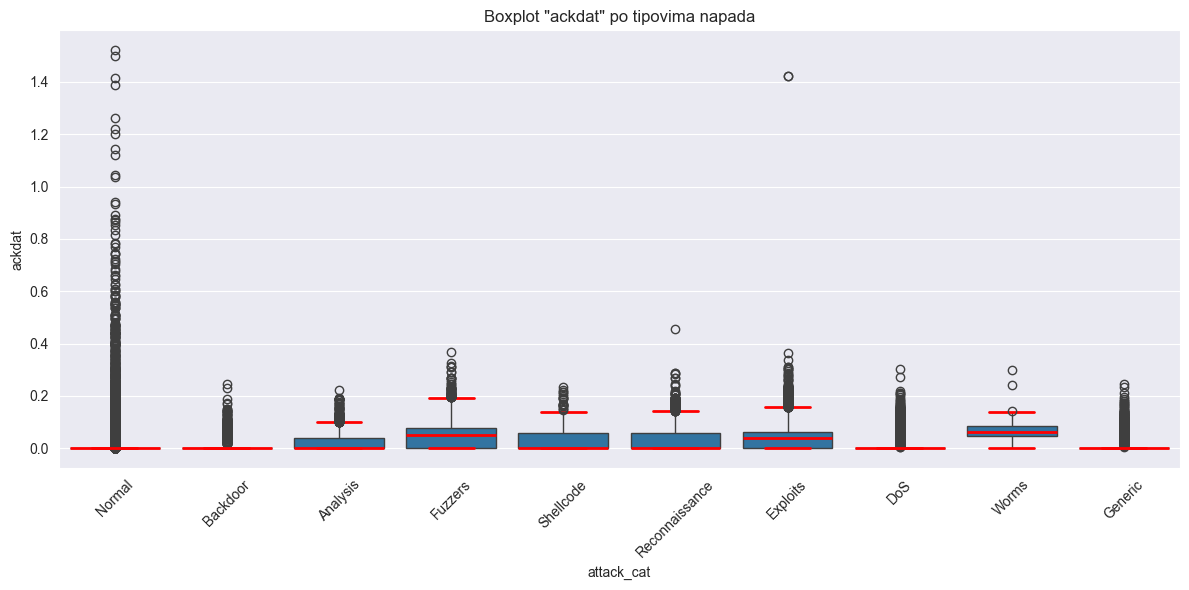

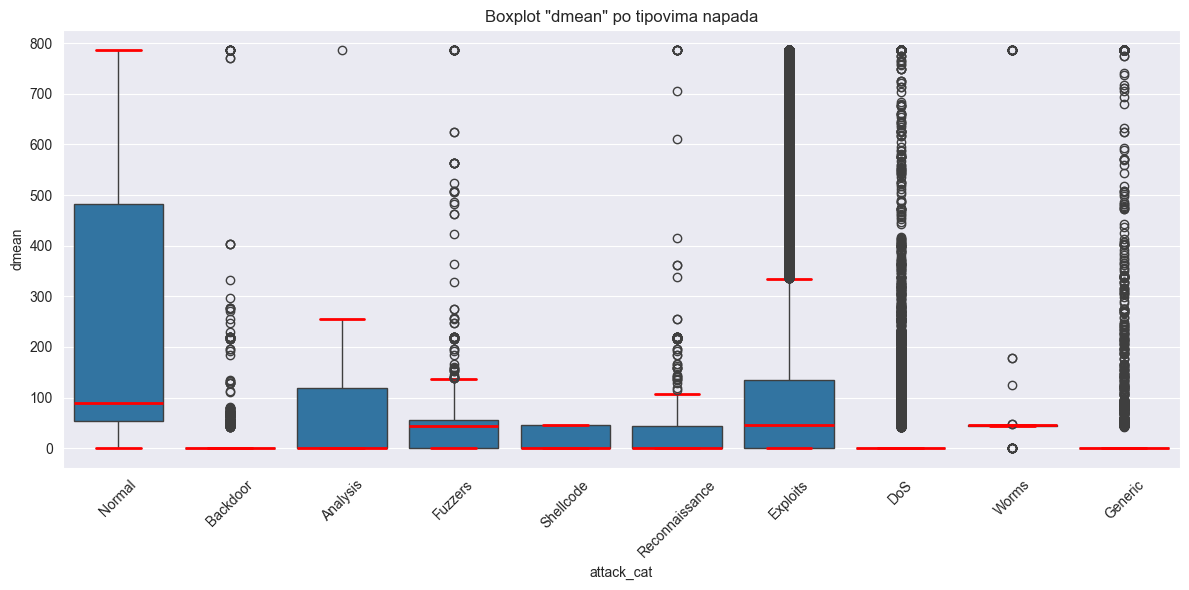

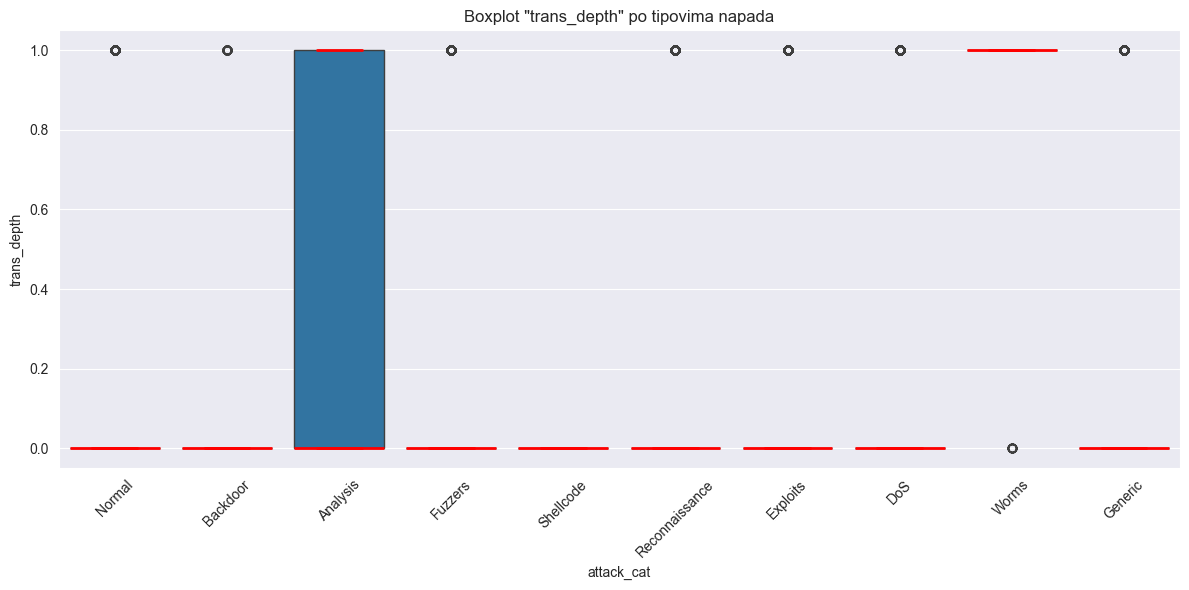

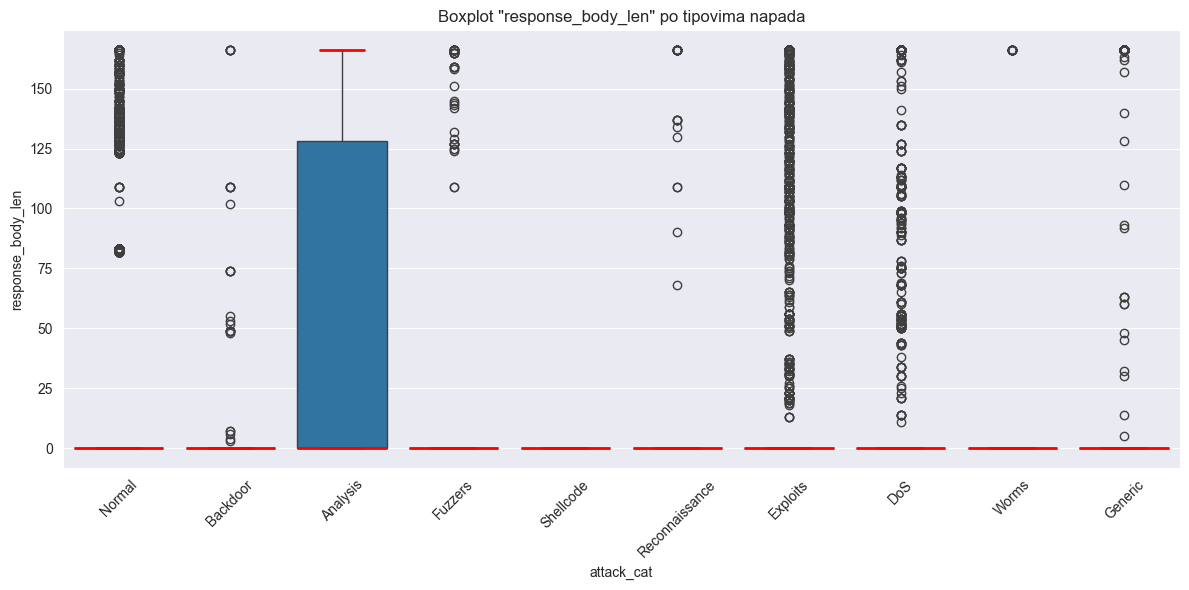

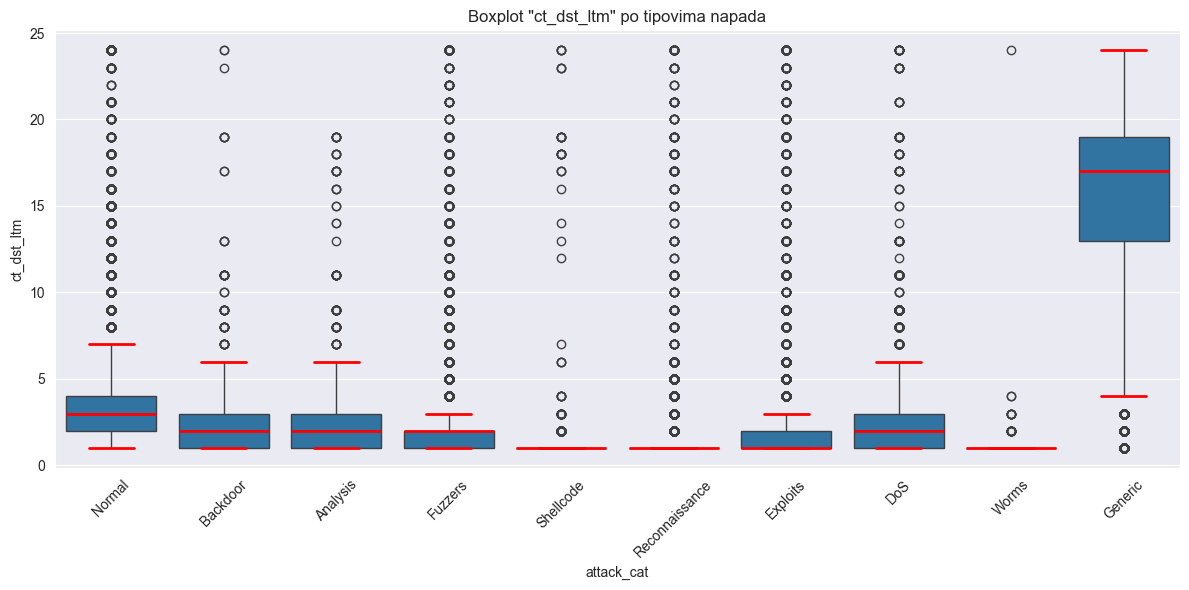

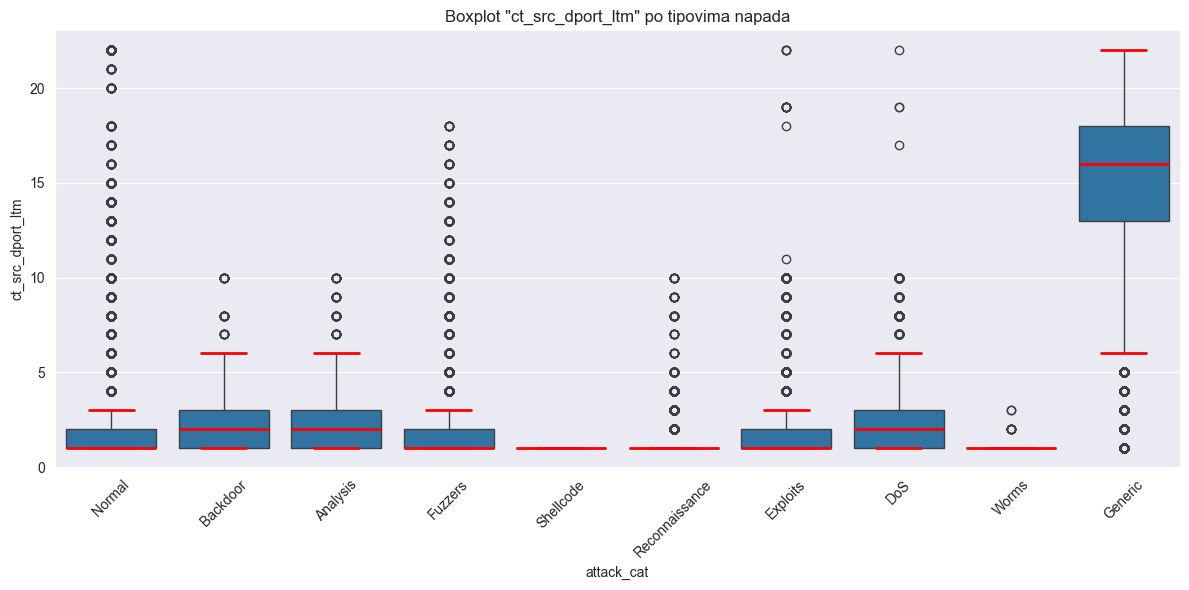

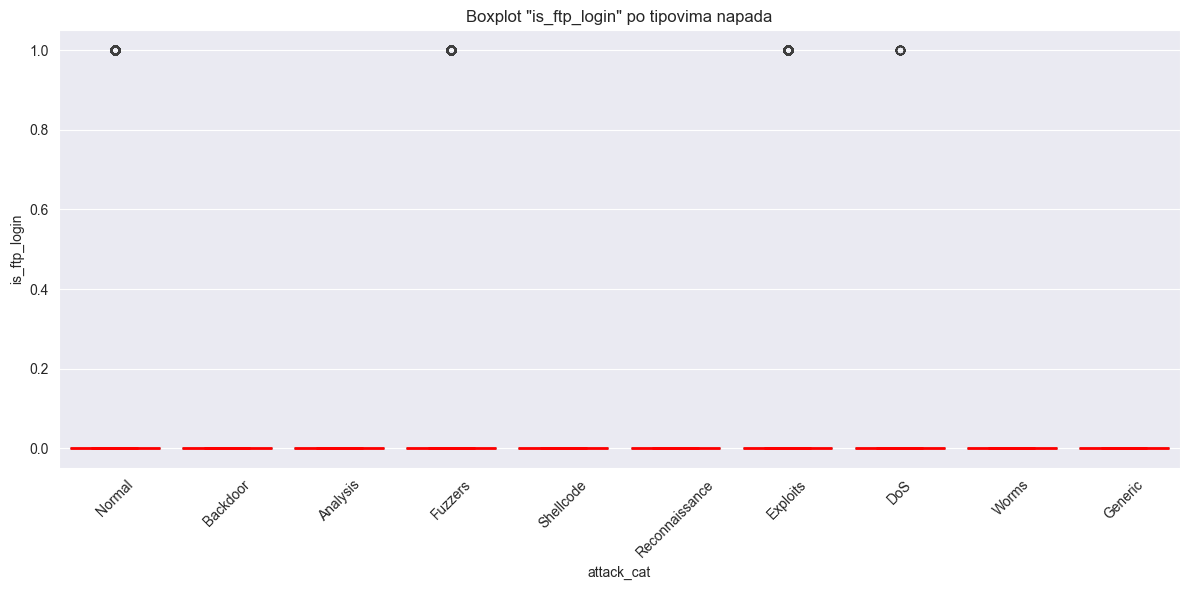

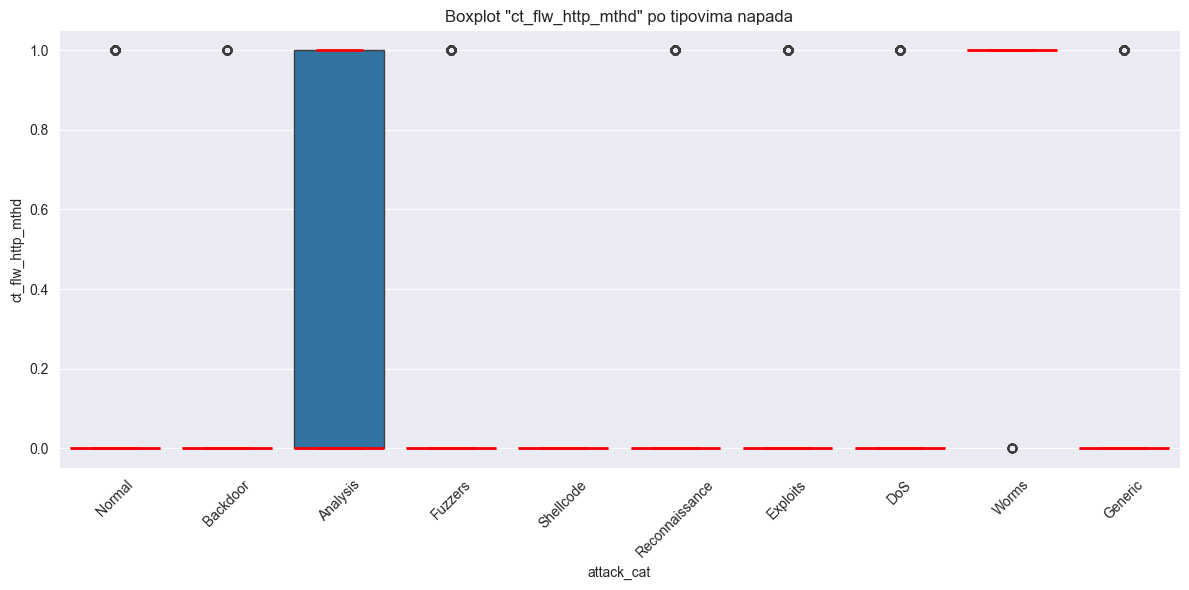

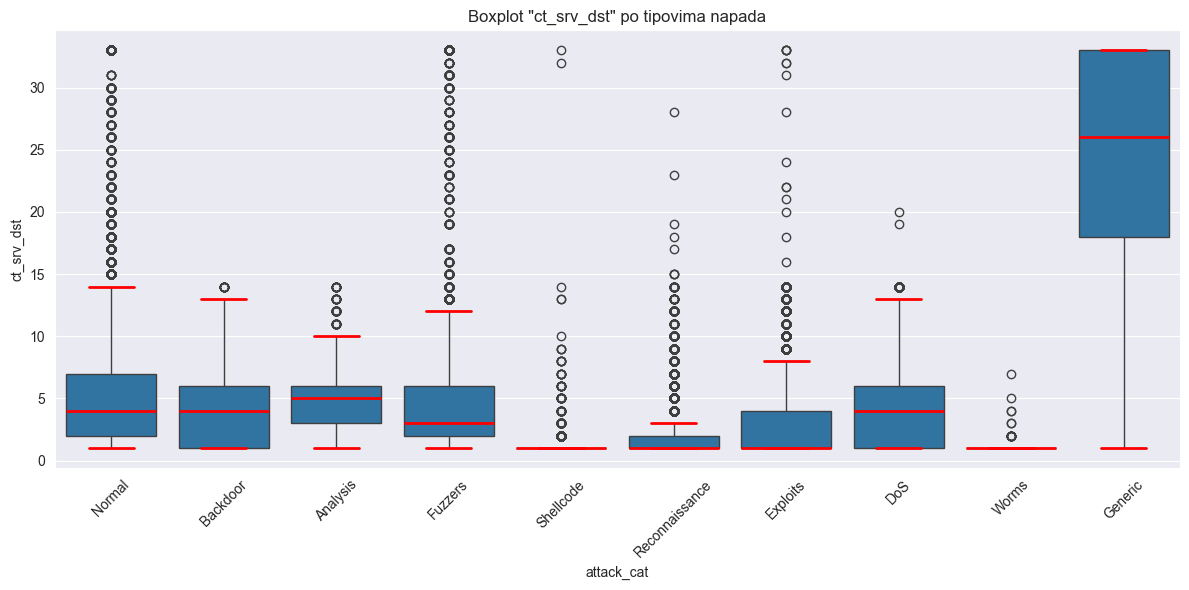

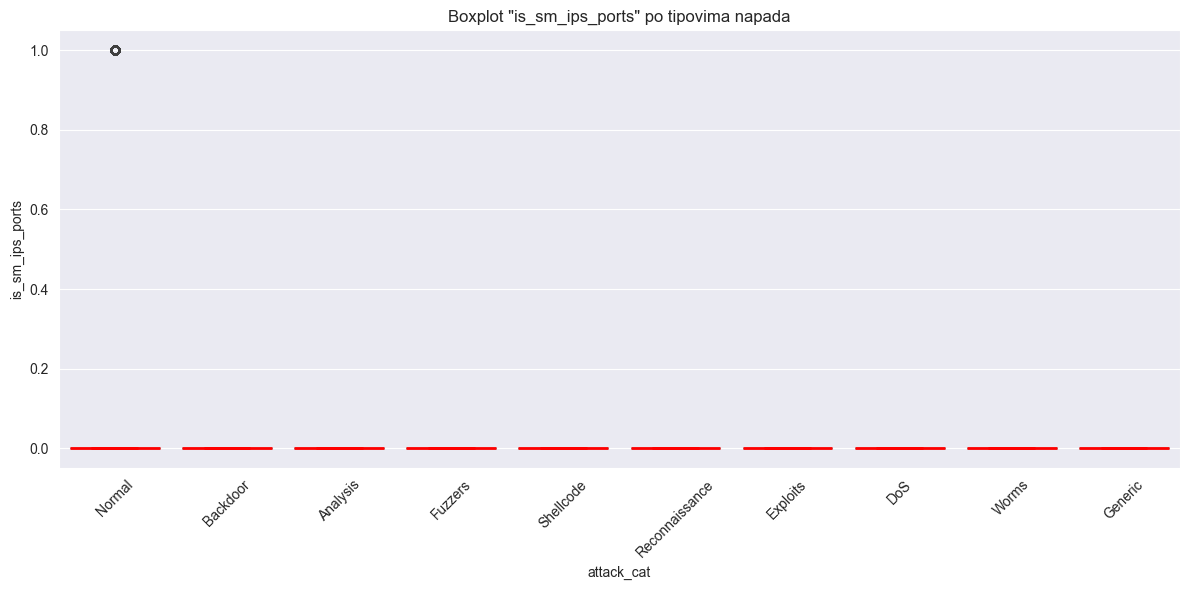

In [838]:
# Za početnu analizu klasa koristićemo boxplotove, njih ćemo porediti po tipovima u okviru svake kolone i zapisati neka od zapažanja.

sns.set_style("darkgrid")
for col in numeric_cols.columns:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=eda_df, x='attack_cat', y=col)

    # Oboj medijane u crveno
    for line in ax.lines:
        xdata, ydata = line.get_xydata().T
        if len(set(ydata)) == 1:
            line.set_color("red")
            line.set_linewidth(2)

    plt.title(f'Boxplot \"{col}\" po tipovima napada')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Veliki broj tackica koji se ne tumace kao autlajeri - samo se odnose na asimetriju podataka.

### Trajanje napada (dur)
Raspon vrednosti se razlikuje od tipa do tipa napada.
Najmanje 75% svih napada koji su tipa Generic imaju trajanje (dur) jako blizu nuli.
Fuzzers, Exploits i Worms imaju najveća, približno slična trajanja.
Normal (normalno ponašanje) i Analysis izgledaju relativno slično jedna drugoj.

### Broj poslatih/primljenih paketa (spkts/dpkts)
DoS i Backdoor imaju skoro iste boxplotove, 50% podataka je minimum.
Backdoor, Analysis, Shellcode, Dos i Generic imaju 50% podataka gde je spkts jako mali (oko 2).
Worms - skoro svi podaci fokusirani oko jedne vrednosti - 10.

### Sbytes / Dbytes
Shellcode i Worms ne dobija skoro ništa nazad od podataka, iako ih šalju, komunikacija jednosmerna. Očekivano za ovaj tip napada.

### Rate
Normal rate veoma nizak u odnosu na napade. Worms jedini sličan normalnom saobraćaju.
Generic - Ova kategorija ima najširi raspon brzina za srednjih 50% podataka (najveća kutija), sa medijanom oko 120.000 i vrednostima koje idu i do 250.000. - može ukazivati na to da je ovo opšta kategorija napada.
Backdoor, Analysis i Dos skoro isti i  imaju visoke vrednosti.
Shellcode median primetno niži u odnosu na druge agresivnije napade.
Fuzzers i Exploits identični boxplotovi.

### Sttl
Sttl vrednost jako visoka (iznad 250) za sve napade, u odnosu na Normal koji je ispod 50.
Ističu se Analysis i Exploits koje imaju širok range vrednosti.

### Dttl
Backdoor, Dos, Generic skoro svi podaci jako blizu nule ili nula.
Worms skoro svi podaci imaju najviše vrednosti (250).

### Dload - brzina prijema
Normal - veliki dload. Očekivano, većina internet aktivnosti, kao što su pregledanje veb stranica ili striming videa podrazumeva prijem velikih količina podataka.
Napadi - skoro sve vrednosti dload veoma niske. Primećuje se kod Exploits, Dos, Generic malo veća količina podataka u odnosu na ostale.


### Sload - brzina slanja podataka
Normal 75% podataka jako blizu 0. Napadi imaju mnogo veće vrednosti.
Backdoor, Analysis, DoS skoro isti boxplotovi, najviše vrednosti.
Reconissance, Exploits, identični skoro - 50% vrednosti jako blizu nule.
Worms skoro svi podaci jako blizu 0.

### Sloss/Dloss
Backdoor, DoS, Generic svi podaci jako blizu 0.
Exploits i Fuzzers najviši.

### Sjit
Fuzzers, Worms, najviše vrednosti

### Swin
Backdoor, Dos, Generic jako blizu nule svi podaci.
Worms svi podaci najviše vrednost (iznad 250).

### Dmean
B,DoS,Gen isti najnizi
Exploits, Fuzzers - najvisi ali imaju range
Worms samo nema range sve je visoko

### Trans_depth
Veliki raspon vrednosti za Analysis. Najizraženiji Worms -  svi podaci najveća vrednost.
Svi ostali tipovi, za sve podatke, uzimaju minimum.

### response_body_len
Opet se ističe Analysis,  uzima veliki range podataka. Svi ostali niski ili na minimumu.

### Count (ct_*) kolone
Ct_srv_src - Fuzzers I Normal identicni.
ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_dport_ltm, ct_src_sport_ltm, ct_dst_src_ltm, ct_src_ltm, ct_srv_dst  -  odlični prediktori za Generic tip napada. Visoke vrednosti na ovim dijagramima su jak indikator za ovakav tip saobraćaja, jer je on jedini koji ima tako izrazito visoke brojeve.

Ne uticu na razlikovanje klasa:
Is_ftp_login
Ct_ftp_cmd
Is_sm_ips_ports

Ct_flw_http_mthd - analysis se istice sa velikim range, worms u suprotnosti od svih ostalih (najveće vrednosti)


### Tipovi napada - zaključak o karakteristikama na osnovu boxplotova i funkcija gustine

### Normal i Analysis
Ove dve kategorije izgledaju relativno slično jedna drugoj, posebno kada je reč o trajanju napada (dur) i rasponu vrednosti za rate. Međutim, Analysis se izdvaja po širokom rasponu vrednosti za Trans_depth i response_body_len, što ukazuje na kompleksnije i raznovrsnije aktivnosti u odnosu na druge napade, ali I normalan saobracaj.

### Generic
Širok raspon vrednosti za rate i druge metrike se uklapa u ideju da ova kategorija obuhvata razne vrste napada koje se ne mogu precizno klasifikovati u druge, specifičnije grupe.
Dosta dobar pokazetlj za ovaj tip cu takozvane ct_* kolone.

### Worms
Ovaj tip napada ima jedinstven profil koji ga izdvaja od ostalih. Gotovo svi podaci za spkts su fokusirani oko jedne vrednosti (10), a komunikacija je jednosmerna (Sbytes su visoke, Dbytes su niske). Trajanje je među najvišim, slično kao kod Fuzzers i Exploits. Worms su jedini napad koji ima rate sličan normalnom saobraćaju.

### DoS i Backdoor
Dosta slični oblici ponašanja. Visok rate, i nedostatak odgovora od servera su bitni indikatori.

### Shellcode
Rate median primetno niži u odnosu na druge agresivnije napade. Ne dobija podatke nazad, iako ih šalje, jednosmeran.

### Reconnaissance
Dosta sličan tipu Analysis.
ct_dst_src_ltm i ct_srv_src su izuzetno dobri za razlikovanje ovih tipova. Njihovo glavno svojstvo je da imaju veoma različite distribucije za ove dve klase: Reconnaissance je ekstremno koncentrisan na vrednosti blizu nule, dok Analysis ima mnogo širu i ravnomerniju distribuciju sa višim vrednostima.

### Fuzzers I Exploits
Dosta slični oblici ponašanja. Na osnovu funkcija gustine zaključujemo da je jedna od bitnijih razlika broj poslatih bajtova(sbytes). Za sbytes , Exploits napadi su koncentrisani na niže vrednosti, dok su Fuzzers napadi fokusirani na više vrednosti. Ključna razlika je u tome što se "fuzzeri" gotovo u potpunosti grupišu oko niskih vrednosti "dmean", dok "exploiti" pokazuju distribuciju koja, iako takođe često niska, uključuje i značajne, visoke vrednosti oko 800.

# Pretvaranje kategoričkih podataka u numeričke

In [839]:
# Ostalo nam je svega 3 kolone s kategorickim vrednostima => vrsimo konvezriju u kolone s numerickim vrednostima
cat_cols = unsw_trset.select_dtypes(include=['object']).columns
cat_cols

Index(['proto', 'state', 'attack_cat'], dtype='object')

### 1. Kolona attack_cat

In [840]:
# Ako izuzmemo normalne tipove konekcija, ostaje nam 9 tipova napada
unsw_trset['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [841]:
# mapiramo kategoricke tipove napada u numericki tip, skalirano prema njihovoj destruktivnosti
attack_map = {
    'Normal': 0,           # benigno
    'Fuzzers': 1,
    'Reconnaissance': 2,
    'Analysis': 3,
    'Generic': 4,
    'Backdoor': 5,
    'Exploits': 6,
    'DoS': 7,
    'Shellcode': 8,
    'Worms': 9             # veoma destruktivno
}

unsw_trset['attack_cat'] = unsw_trset['attack_cat'].map(attack_map)

### 2. Kolona 'proto'


In [842]:
# ova kolona sadrzi preko 100 razlicitih tipova vrednosti za protokole => morace da se mapira na tipove protokola koji su korisceni
unsw_trset['proto'].unique()


array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [843]:
proto_map = {
    'tcp': 0, 'udp': 0, 'icmp': 0, 'ip': 0,             # 0 za TCP/IP protokole
    'ospf': 1, 'igmp': 1, 'eigrp': 1, 'rsvp': 1,        # 1 za protokole rutiranja (routing proto)
    'arp': 2, 'ax.25': 2, 'etherip': 2, 'l2tp': 2,      # 2 za protokole sloja veze (link layer)
    'gre': 3, 'ipip': 3, 'ipcomp': 3, 'skip': 3         # 3 za tunneling protokole
}

unsw_trset['proto'] = unsw_trset['proto'].map(proto_map).fillna(4).astype(int) # 4 ako ne pripada nijednoj grupi, svrstaj u neuobicajene protokole
# (moze biti dobro za analizu kasnije), s obzirom da su neobicni protokoli

### 3. Kolona 'state'

In [844]:
unsw_trset['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN'],
      dtype=object)

In [845]:
# Sad radimo mapiranje //potencijalno primeniti hot encoding
state_map = {
    'CON': 0,                       # 0 za uspesno uspostavljanje konekcije
    'FIN': 1,                       # 1 za uspesan kraj konekcije
    'REQ': 2, 'ECO': 2, 'INT': 2,   # 2 za pomocna stanja
    'RST': 3, 'PAR': 3, 'URN': 3,   # 3 za abnormalna stanja (prekidi, urgentn)
}

unsw_trset['state'] = unsw_trset['state'].map(state_map)

### Prikaz ociscene numericke tabele

In [846]:
unsw_trset

dur  proto  state  spkts  dpkts  sbytes  dbytes           rate  \
0       0.121478      0      1      6      4     258     172      74.087490   
1       0.649902      0      1     14     38     734   42014      78.473372   
2       1.623129      0      1      8     16     364   13186      14.170161   
3       1.681642      0      1     12     12     628     770      13.677108   
4       0.449454      0      1     10      6     534     268      33.373826   
...          ...    ...    ...    ...    ...     ...     ...            ...   
175314  0.000009      0      2      2      0     114       0  111111.107200   
175315  0.505762      0      1     10      8     620     354      33.612649   
175316  0.000009      0      2      2      0     114       0  111111.107200   
175317  0.000009      0      2      2      0     114       0  111111.107200   
175318  0.000009      0      2      2      0     114       0  111111.107200   

        sttl  dttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0        252   254  ...                 1               1             0   
1         62   252  ...                 1               2             0   
2         62   252  ...                 1               3             0   
3         62   252  ...                 1               3             1   
4        254   252  ...                 1              40             0   
...      ...   ...  ...               ...             ...           ...   
175314   254     0  ...                13              24             0   
175315   254   252  ...                 1               2             0   
175316   254     0  ...                 3              13             0   
175317   254     0  ...                14              30             0   
175318   254     0  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175314           0                 0          24          24                0   
175315           0                 0           1           1                0   
175316           0                 0           3          12                0   
175317           0                 0          30          30                0   
175318           0                 0          30          30                0   

        attack_cat  label  
0                0      0  
1                0      0  
2                0      0  
3                0      0  
4                0      0  
...            ...    ...  
175314           4      1  
175315           8      1  
175316           4      1  
175317           4      1  
175318           4      1  

[175318 rows x 43 columns]

### Rezime

* attack_cat – iz kategorija (Normal, Fuzzers, itd.) transformisana u numeričke vrednosti na osnovu ozbilnosti napada
* proto – grupisani protokoli u 5 kategorija (0–4)
* state – grupisani statusi konekcije (0–3)

In [847]:
print(len(unsw_trset.columns))
unsw_trset.columns

43


Index(['dur', 'proto', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack',
       'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

# Podela podataka na test i train

In [848]:
from sklearn.model_selection import train_test_split
# Podela na trening/test uz stratifikaciju po targetu (label).
# random_state obezbeđuje reprodukovanje rezultata.
X_train, X_test, y_train, y_test= train_test_split(unsw_trset.drop(columns=['label','attack_cat'], errors='ignore'), 
                                                    unsw_trset['label'], 
                                                    test_size = 0.2, 
                                                    random_state = 20)
unsw_trset = X_train


In [849]:
print(unsw_trset is X_train)

True


## Korelacija - Katarina i Marko

In [850]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42, max_depth=None)
tree.fit(X_train, y_train)

# Uzimamo važnosti feature-a
importances = pd.Series(tree.feature_importances_, index=X_train.columns)

# Sortiramo ih
importances = importances.sort_values(ascending=False)
print(importances)

sttl                 0.675544
ct_srv_dst           0.061284
sbytes               0.048073
smean                0.028344
ct_srv_src           0.014850
synack               0.010765
ackdat               0.009575
stcpb                0.009423
dtcpb                0.009077
proto                0.008999
dload                0.008862
ct_dst_src_ltm       0.008780
tcprtt               0.008612
sload                0.008488
djit                 0.008262
dbytes               0.006855
ct_src_ltm           0.006829
dur                  0.006680
state                0.006562
sloss                0.006539
sinpkt               0.006305
dmean                0.006082
rate                 0.006080
sjit                 0.005480
ct_dst_ltm           0.005171
dinpkt               0.004968
ct_src_dport_ltm     0.003524
ct_flw_http_mthd     0.002496
ct_dst_sport_ltm     0.001793
dpkts                0.001723
response_body_len    0.001711
dloss                0.001224
spkts                0.000425
trans_dept

Predlog je ukloniti kolone sa skoro 0 važnosti, a to su:
swin, dwin, is_sm_ips_ports, ct_state_ttl, is_ftp_login, ct_ftp_cmd, response_body_len, trans_depth, dttl


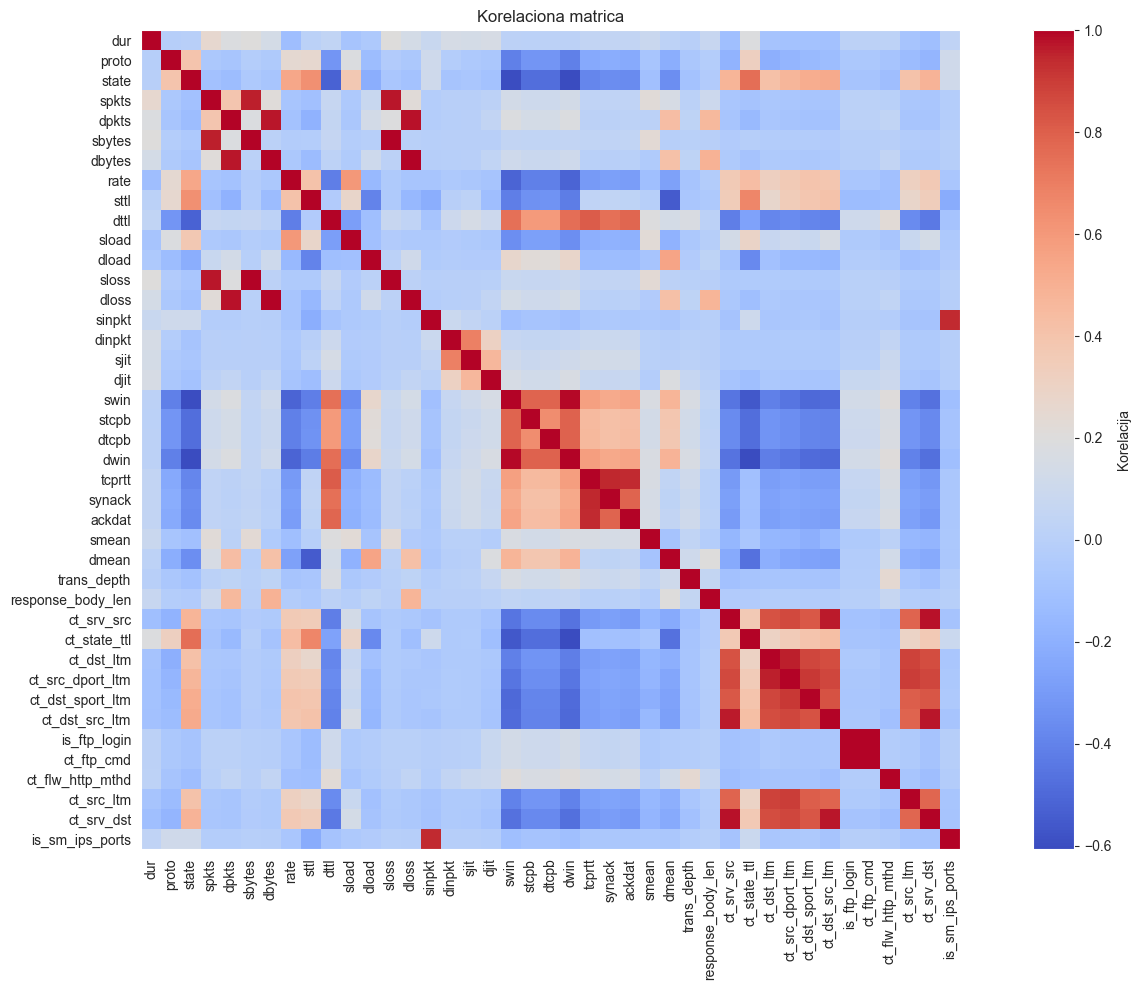

In [851]:
corr_matrix = unsw_trset.corr()

#Crtanje heatmape
plt.figure(figsize=(15, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Korelacija')

# Dodavanje oznaka kolona
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Korelaciona matrica")
plt.tight_layout()
plt.grid(False)

plt.show()

In [852]:
def plot_strong_correlations(df, threshold=0.8):   
    corr_matrix = df.corr()
    # Izdvajanje jake korelacije (> 0.8) osim savršenih dijagonala (1.0)
    threshold = 0.8
    strong_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)]

    # Izdvajanje svih kolona koje su u jakoj vezi
    strong_columns = set()
    for col in strong_corr.columns:
        # Ovde tražimo sve kolone koje su povezane sa trenutnom kolonom
        # .index[...] da izvučemo imena kolona koje su u vezi sa trenutnom
        related = strong_corr.index[strong_corr[col].notna()].tolist()

        # Ako postoje povezane kolone:
            #add(col) - dodajemo i tu početnu kolonu (jer je i ona deo veze)
            #update(related) - dodaj sve kolone iz related liste u set
        if related:
            strong_columns.add(col)
            strong_columns.update(related)

    # Kreiranje podmatrice samo za te kolone
    strong_corr_matrix = corr_matrix.loc[list(strong_columns), list(strong_columns)]


    plt.figure(figsize=(12, 10))
    plt.imshow(strong_corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(strong_corr_matrix.columns)), strong_corr_matrix.columns, rotation=90)
    plt.yticks(range(len(strong_corr_matrix.index)), strong_corr_matrix.index)
    plt.title('Heatmapa: Korelacija između snažno povezanih osobina (|r| > 0.8)')
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [853]:
plot_strong_correlations(df=unsw_trset)

In [854]:
# korelacija A-B ista kao i B-A pa bismo ulonili duplikate
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Prikazivanje samo parova gde je korelacija > 0.8
high_corr_pairs = corr_matrix.where(mask).stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8]

print("Parovi sa korelacijom većom od 0.8:")
print(high_corr_pairs)

Parovi sa korelacijom većom od 0.8:
spkts             sbytes              0.960685
                  sloss               0.968685
dpkts             dbytes              0.973928
                  dloss               0.980671
sbytes            sloss               0.995629
dbytes            dloss               0.996583
dttl              tcprtt              0.806000
sinpkt            is_sm_ips_ports     0.940758
swin              dwin                0.990250
tcprtt            synack              0.948426
                  ackdat              0.940111
ct_srv_src        ct_dst_ltm          0.841111
                  ct_src_dport_ltm    0.865718
                  ct_dst_sport_ltm    0.822775
                  ct_dst_src_ltm      0.967283
                  ct_srv_dst          0.980335
ct_dst_ltm        ct_src_dport_ltm    0.962051
                  ct_dst_sport_ltm    0.870504
                  ct_dst_src_ltm      0.852029
                  ct_src_ltm          0.886304
                  ct_srv

## Zaključci
### Najkorelisanije
* is_ftp_login i ct_ftp_cmd -> izbacujemo  ct_ftp_cmd
* trans_depth i ct_flw_http_mthd -> izbacujemo ct_flw_http_mthd
* spkts, dpkts, sloss, dloss -> izbacujemo  spkts i dpkts
* dpkts, dbytes, dmean, dloss -> izbacujemo dmean i dloss  
* swin i dwin -> Izbacujemo swin
* ct_srv_src, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, ct_srv_dst, ct_src_ltm -> ct_srv_dst ima najjaču povezanost sa većinom ostalih (0.97 sa ct_dst_src_ltm, 0.98 sa ct_srv_src), pa može ostati. Izbacujemo ct_srv_src, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, ct_src_ltm



Kratka provera visoko korelisanih kolona

In [855]:
sns.pairplot(corr_matrix[['sbytes', 'sloss','spkts']])
plt.show()

In [856]:
sns.pairplot(corr_matrix[['dloss', 'dbytes','dpkts']])
plt.show()

Otklanjanje visoko korelisanih kolona (|r|>0.8)

In [857]:
print(high_corr_pairs)

spkts             sbytes              0.960685
                  sloss               0.968685
dpkts             dbytes              0.973928
                  dloss               0.980671
sbytes            sloss               0.995629
dbytes            dloss               0.996583
dttl              tcprtt              0.806000
sinpkt            is_sm_ips_ports     0.940758
swin              dwin                0.990250
tcprtt            synack              0.948426
                  ackdat              0.940111
ct_srv_src        ct_dst_ltm          0.841111
                  ct_src_dport_ltm    0.865718
                  ct_dst_sport_ltm    0.822775
                  ct_dst_src_ltm      0.967283
                  ct_srv_dst          0.980335
ct_dst_ltm        ct_src_dport_ltm    0.962051
                  ct_dst_sport_ltm    0.870504
                  ct_dst_src_ltm      0.852029
                  ct_src_ltm          0.886304
                  ct_srv_dst          0.852615
ct_src_dport_

In [858]:
#Izbacivanje na osnovu korelacija
features_to_drop = ['ct_ftp_cmd','ct_flw_http_mthd','spkts','dpkts','dmean','dloss','swin','ct_srv_src', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm']
unsw_trset = unsw_trset.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print("Izbačene kolone:", features_to_drop)
print("Preostale kolone", unsw_trset.columns)

Izbačene kolone: ['ct_ftp_cmd', 'ct_flw_http_mthd', 'spkts', 'dpkts', 'dmean', 'dloss', 'swin', 'ct_srv_src', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm']
Preostale kolone Index(['dur', 'proto', 'state', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb',
       'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'trans_depth',
       'response_body_len', 'ct_state_ttl', 'ct_dst_ltm', 'is_ftp_login',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


In [859]:
# Izbacivanje na osnovu rezultata stabla odlučivanja
drop_cols = ['dwin', 'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login', 
             'response_body_len', 'trans_depth', 'dttl']

# Filtriranje X_train i X_test
unsw_trset = unsw_trset.drop(columns=[col for col in drop_cols if col in unsw_trset.columns])
X_test = X_test.drop(columns=[col for col in drop_cols if col in X_test.columns])

# Provera
print("Preostale kolone u unsw_trset:", unsw_trset.columns.tolist())
print("Preostale kolone u X_test:", X_test.columns.tolist())


Preostale kolone u unsw_trset: ['dur', 'proto', 'state', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean', 'ct_dst_ltm', 'ct_srv_dst']
Preostale kolone u X_test: ['dur', 'proto', 'state', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean', 'ct_dst_ltm', 'ct_srv_dst']


# Feature Engeneering - Katarina i Marko

---
1. Odnos poslatih i primljenih bajtova = sbytes / (dbytes + 1) - Veći odnos može da ukazuje na napade koji zahtevaju prenos vece količine podataka.
2. Odnos opterećenja = sload / (dload + 1) - Neuravnotežen odnos opterećenja može biti pokazatelj neuobičajenog mrežnog saobraćaja
3. Odnos jitter-a = sjit / (djit + 1) -  Meri promene u vremenu dolaska paketa. Visok jitter može biti znak napada ili problema u mreži
4. Odnos postavke TCP veze = tcprtt /(synack + ackdat + 1)
5. Odnos između paketa = sinpkt /(dinpkt + 1) -  očekuje se stabilan obrazac, dok nepravilni intervali mogu ukazivati na napad

In [860]:
unsw_trset['byte_ratio'] = unsw_trset['sbytes'] / (unsw_trset['dbytes'] + 1)
unsw_trset['load_ratio'] = unsw_trset['sload'] / (unsw_trset['dload'] + 1)
unsw_trset['jit_ratio'] = unsw_trset['sjit'] / (unsw_trset['djit'] + 1)
unsw_trset['tcp_setup_ratio'] = unsw_trset['tcprtt'] / (unsw_trset['synack'] + unsw_trset['ackdat'] + 1)
unsw_trset['inter_pkt_ratio'] = unsw_trset['sinpkt'] / (unsw_trset['dinpkt'] + 1)

unsw_trset

dur  proto  state  sbytes  dbytes           rate  sttl  \
152259  0.000004      0      2     114       0  250000.000600   254   
91962   0.000003      4      2     200       0  333333.321500   254   
103560  0.512021      0      1     364    3754      33.201763    62   
67918   0.000009      4      2     200       0  111111.107200   254   
31512   0.001063      0      0     146     178    2822.201463    31   
...          ...    ...    ...     ...     ...            ...   ...   
124309  0.000009      0      2     114       0  111111.107200   254   
31963   0.080968      0      1    4342   63516    1815.532062    31   
23776   0.001090      0      0     146     178    2752.293491    31   
37136   0.185536      0      1    2934    3742     565.927915    31   
92635   0.000005      4      2     200       0  200000.005100   254   

               sload         dload  sloss  ...    synack    ackdat  smean  \
152259  1.140000e+08  0.000000e+00      0  ...  0.000000  0.000000     57   
91962   2.666667e+08  0.000000e+00      0  ...  0.000000  0.000000    100   
103560  4.984170e+03  5.279471e+04      1  ...  0.034154  0.029804     46   
67918   8.888889e+07  0.000000e+00      0  ...  0.000000  0.000000    100   
31512   5.493886e+05  6.698025e+05      0  ...  0.000000  0.000000     73   
...              ...           ...    ...  ...       ...       ...    ...   
124309  5.066666e+07  0.000000e+00      0  ...  0.000000  0.000000     57   
31963   4.232783e+05  6.190890e+06      7  ...  0.002175  0.000153     59   
23776   5.357798e+05  6.532110e+05      0  ...  0.000000  0.000000     73   
37136   1.240945e+05  1.583736e+05     11  ...  0.000519  0.000120     56   
92635   1.600000e+08  0.000000e+00      0  ...  0.000000  0.000000    100   

        ct_dst_ltm  ct_srv_dst  byte_ratio    load_ratio  jit_ratio  \
152259          13          18  114.000000  1.140000e+08   0.000000   
91962            2           9  200.000000  2.666667e+08   0.000000   
103560           2           1    0.096937  9.440484e-02   1.254154   
67918            2           3  200.000000  8.888889e+07   0.000000   
31512            4           4    0.815642  8.202235e-01   0.000000   
...            ...         ...         ...           ...        ...   
124309          16          34  114.000000  5.066666e+07   0.000000   
31963            3           6    0.068360  6.837115e-02  25.655956   
23776            1           6    0.815642  8.202235e-01   0.000000   
37136            7           1    0.783863  7.835507e-01  23.148548   
92635            6          12  200.000000  1.600000e+08   0.000000   

        tcp_setup_ratio  inter_pkt_ratio  
152259         0.000000         0.004000  
91962          0.000000         0.003000  
103560         0.060113         1.422244  
67918          0.000000         0.009000  
31512          0.000000         0.008937  
...                 ...              ...  
124309         0.000000         0.009000  
31963          0.002323         0.538696  
23776          0.000000         0.009930  
37136          0.000639         0.829313  
92635          0.000000         0.005000  

[140254 rows x 27 columns]

In [861]:
#Isto radimo i za test kako bi bilo konzistentno
X_test['byte_ratio'] = X_test['sbytes'] / (X_test['dbytes'] + 1)
X_test['load_ratio'] = X_test['sload'] / (X_test['dload'] + 1)
X_test['jit_ratio'] = X_test['sjit'] / (X_test['djit'] + 1)
X_test['tcp_setup_ratio'] = X_test['tcprtt'] / (X_test['synack'] + X_test['ackdat'] + 1)
X_test['inter_pkt_ratio'] = X_test['sinpkt'] / (X_test['dinpkt'] + 1)

In [862]:
plot_strong_correlations(df=unsw_trset)

### Izbacivanje kolona nakon feature engeneering
* sbytes, dbytes -> pokriveno uz byte_ratio
* sload, dload -> pokriveno load_ratio
* sjit, djit -> pokriveno jit_ratio i total_jitter
* synack, ackdat, tcprtt -> pokriveno tcp_setup_ratio
* sinpkt -> pokriveno inter_pkt_ratio
* ct_srv_dst -> visoko korelisana sa ct_dst_ltm, pa se i ona izbacuje

In [863]:
features_to_drop = ['sbytes', 'dbytes', 'sjit', 'djit', 'synack', 'sload', 'dload', 'ackdat', 'sinpkt', 'tcprtt', 'ct_srv_dst']
unsw_trset = unsw_trset.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)


print("Izbačene kolone:", features_to_drop)
print("Preostale kolone", unsw_trset.columns)

Izbačene kolone: ['sbytes', 'dbytes', 'sjit', 'djit', 'synack', 'sload', 'dload', 'ackdat', 'sinpkt', 'tcprtt', 'ct_srv_dst']
Preostale kolone Index(['dur', 'proto', 'state', 'rate', 'sttl', 'sloss', 'dinpkt', 'stcpb',
       'dtcpb', 'smean', 'ct_dst_ltm', 'byte_ratio', 'load_ratio', 'jit_ratio',
       'tcp_setup_ratio', 'inter_pkt_ratio'],
      dtype='object')


c:\temp\ipykernel_31804\215731248.py:26: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(strong_corr_matrix, cmap='coolwarm', interpolation='nearest')
c:\temp\ipykernel_31804\215731248.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(strong_corr_matrix, cmap='coolwarm', interpolation='nearest')


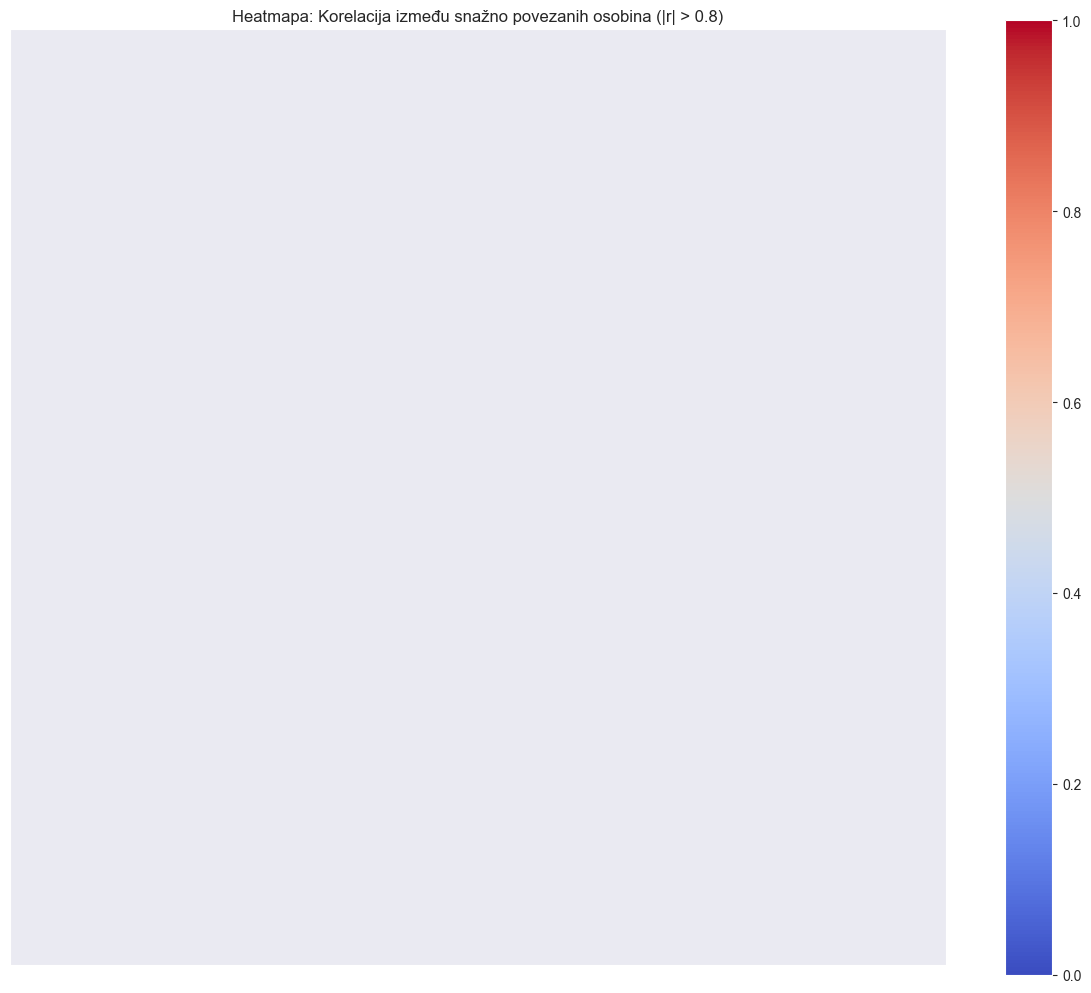

In [864]:
plot_strong_correlations(df=unsw_trset)

# Normalizacija - Miloš i Tamara

In [865]:
print("Broj kolona u našem datasetu: "+str(unsw_trset.columns.size))
print(unsw_trset.columns)

Broj kolona u našem datasetu: 16
Index(['dur', 'proto', 'state', 'rate', 'sttl', 'sloss', 'dinpkt', 'stcpb',
       'dtcpb', 'smean', 'ct_dst_ltm', 'byte_ratio', 'load_ratio', 'jit_ratio',
       'tcp_setup_ratio', 'inter_pkt_ratio'],
      dtype='object')


Kolone koje nećemo normalizovati su dve kategorijske kolone *proto* i *state*. Prvo ćemo još jednom proveriti raspodele preosatlih kolona, kako bismo odabrali pravi pristup pri normalizaciji.

In [866]:
selected_cols = ['dur', 'rate', 'sttl', 'sloss', 'dinpkt', 'stcpb',
       'dtcpb', 'smean', 'ct_dst_ltm', 'byte_ratio', 'load_ratio', 'jit_ratio',
       'tcp_setup_ratio', 'inter_pkt_ratio']

unsw_trset[selected_cols].describe()


dur          rate           sttl          sloss  \
count  140254.000000  1.402540e+05  140254.000000  140254.000000   
mean        1.362784  9.516630e+04     179.409457       4.900880   
std         6.494897  1.650496e+05     102.975665      64.090246   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000008  3.268459e+01      62.000000       0.000000   
50%         0.001646  3.198862e+03     254.000000       0.000000   
75%         0.668853  1.250000e+05     254.000000       3.000000   
max        59.999989  1.000000e+06     255.000000    4803.000000   

              dinpkt         stcpb         dtcpb          smean  \
count  140254.000000  1.402540e+05  1.402540e+05  140254.000000   
mean       88.518995  9.687385e+08  9.686134e+08     136.667190   
std       979.215433  1.354195e+09  1.352805e+09     204.514026   
min         0.000000  0.000000e+00  0.000000e+00      28.000000   
25%         0.000000  0.000000e+00  0.000000e+00      57.000000   
50%         0.006000  0.000000e+00  0.000000e+00      73.000000   
75%        51.222373  1.913071e+09  1.914121e+09     100.000000   
max     56716.824000  4.294959e+09  4.294882e+09    1504.000000   

          ct_dst_ltm     byte_ratio    load_ratio      jit_ratio  \
count  140254.000000  140254.000000  1.402540e+05  140254.000000   
mean        6.193820     241.191651  7.317859e+07     110.014878   
std         8.064422    1704.986107  1.882540e+08    1209.235086   
min         1.000000       0.001974  0.000000e+00       0.000000   
25%         1.000000       0.936170  8.256840e-01       0.000000   
50%         2.000000      37.058347  1.893479e+01       0.000000   
75%         7.000000     114.000000  8.888889e+07      21.906519   
max        51.000000   54944.000000  5.600000e+09   93644.427840   

       tcp_setup_ratio  inter_pkt_ratio  
count    140254.000000    140254.000000  
mean          0.035260       917.736783  
std           0.062017      7204.378616  
min           0.000000         0.000000  
25%           0.000000         0.008000  
50%           0.000000         0.207808  
75%           0.061877         0.798318  
max           0.715820     84371.496000

In [867]:
winsorize(unsw_trset, selected_cols)
unsw_trset[selected_cols].describe()

dur           rate           sttl          sloss  \
count  140254.000000  140254.000000  140254.000000  140254.000000   
mean        0.467536   80831.588483     179.409457       2.157607   
std         0.815705  108566.272170     102.975665       3.292563   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000008      32.684589      62.000000       0.000000   
50%         0.001646    3198.861824     254.000000       0.000000   
75%         0.668853  125000.000300     254.000000       3.000000   
max         3.075402  333333.321500     255.000000      12.000000   

              dinpkt         stcpb         dtcpb          smean  \
count  140254.000000  1.402540e+05  1.402540e+05  140254.000000   
mean       29.481917  9.566403e+08  9.565370e+08     122.233590   
std        49.130240  1.327023e+09  1.325671e+09     143.452097   
min         0.000000  0.000000e+00  0.000000e+00      28.000000   
25%         0.000000  0.000000e+00  0.000000e+00      57.000000   
50%         0.006000  0.000000e+00  0.000000e+00      73.000000   
75%        51.222373  1.913071e+09  1.914121e+09     100.000000   
max       160.367437  3.812492e+09  3.810280e+09     638.000000   

          ct_dst_ltm     byte_ratio    load_ratio      jit_ratio  \
count  140254.000000  140254.000000  1.402540e+05  140254.000000   
mean        5.789703      76.096781  5.294038e+07       9.866296   
std         6.792604      82.515282  7.789665e+07      14.268754   
min         1.000000       0.001974  0.000000e+00       0.000000   
25%         1.000000       0.936170  8.256840e-01       0.000000   
50%         2.000000      37.058347  1.893479e+01       0.000000   
75%         7.000000     114.000000  8.888889e+07      21.906519   
max        24.000000     240.000000  2.666667e+08      40.738885   

       tcp_setup_ratio  inter_pkt_ratio  
count    140254.000000    140254.000000  
mean          0.035260         0.583879  
std           0.062017         0.977709  
min           0.000000         0.000000  
25%           0.000000         0.008000  
50%           0.000000         0.207808  
75%           0.061877         0.798318  
max           0.715820         4.231147

## Log transformacija i RobustScaler
 Robust standardizacija se koristi kada ulazne promenljive imaju outliere koji mogu iskriviti raspodelu i otežati normalizaciju pomoću proseka i standardne devijacije. Umesto proseka i standardne devijacije, koristi se medijana i interkvartilni raspon (IQR) kako bi se promenljiva skalirala. Na taj način outlieri ostaju prisutni ali ne utiču na skaliranje, a rezultati su lakše interpretabilni.

* Kolone koje imaju ekstremne vrednosti i veliki raspon - na njih prvo primenjujemo log1p, a zatim RobustScaler.

['rate','stcpb','dtcpb','byte_ratio','load_ratio','jit_ratio','inter_pkt_ratio']

* Kolone koje nemaju prevelik raspon vrednosti, ali imaju asimetričnu raspodelu - na njih ćemo primeniti samo RobustScaler()

['dur','sttl','sloss','dinpkt','smean','ct_dst_ltm']


In [868]:
from sklearn.preprocessing import RobustScaler

# Kolone sa ekstremnim vrednostima i velikim rasponom
log_then_scale_cols = ['rate','stcpb','dtcpb','byte_ratio','load_ratio','jit_ratio','inter_pkt_ratio']

# Kolone sa asimetričnom raspodelom ali bez velikog raspona
scale_only_cols = ['dur','sttl','sloss','dinpkt','smean','ct_dst_ltm']

# Inicijalizacija RobustScaler-a
scaler = RobustScaler()

# 1. log1p + RobustScaler za log_then_scale_cols
unsw_trset[log_then_scale_cols] = unsw_trset[log_then_scale_cols].apply(np.log1p)
unsw_trset[log_then_scale_cols] = scaler.fit_transform(unsw_trset[log_then_scale_cols])

# 2. Samo RobustScaler za scale_only_cols
unsw_trset[scale_only_cols] = scaler.fit_transform(unsw_trset[scale_only_cols])


In [869]:
# Proveravamo rezultate
X_train=unsw_trset
unsw_trset.describe()

dur          proto          state           rate  \
count  140254.000000  140254.000000  140254.000000  140254.000000   
mean        0.696559       0.637337       1.405543      -0.030002   
std         1.219572       1.418553       0.626480       0.501246   
min        -0.002461       0.000000       0.000000      -0.981972   
25%        -0.002449       0.000000       1.000000      -0.554058   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.997551       0.000000       2.000000       0.445942   
max         4.595618       4.000000       3.000000       0.565278   

                sttl          sloss         dinpkt          stcpb  \
count  140254.000000  140254.000000  140254.000000  140254.000000   
mean       -0.388492       0.719202       0.575450       0.447524   
std         0.536332       1.097521       0.959156       0.493980   
min        -1.322917       0.000000      -0.000117       0.000000   
25%        -1.000000       0.000000      -0.000117       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.999883       1.000000   
max         0.005208       4.000000       3.130691       1.032265   

               dtcpb          smean     ct_dst_ltm    byte_ratio  \
count  140254.000000  140254.000000  140254.000000  1.402540e+05   
mean        0.447524       1.144967       0.631617 -1.801397e-01   
std         0.494012       3.336095       1.132101  5.216516e-01   
min         0.000000      -1.046512      -0.166667 -8.905369e-01   
25%         0.000000      -0.372093      -0.166667 -7.292478e-01   
50%         0.000000       0.000000       0.000000  5.436596e-17   
75%         1.000000       0.627907       0.833333  2.707522e-01   
max         1.032212      13.139535       3.666667  4.519043e-01   

         load_ratio      jit_ratio  tcp_setup_ratio  inter_pkt_ratio  
count  1.402540e+05  140254.000000    140254.000000    140254.000000  
mean   3.277164e-01       0.400235         0.035260         0.268300  
std    4.871203e-01       0.489221         0.062017         0.746620  
min   -1.690569e-01       0.000000         0.000000        -0.326157  
25%   -1.350500e-01       0.000000         0.000000        -0.312393  
50%    1.254424e-17       0.000000         0.000000         0.000000  
75%    8.649500e-01       1.000000         0.061877         0.687607  
max    9.270152e-01       1.191610         0.715820         2.532156

Iz ovih statistika možemo videti da je naše skaliranje bilo uspešno. Kategorijske kolone nisu dirane, ostale su enkodirane, dok su ostale poprimile svoje nove, skalirane vrednosti.

# Balansiranje klasa - Mihajlo, Strahinja

In [870]:
# Uvoz biblioteka za podelu podataka, obuku i evaluaciju klasifikatora.
# Funkcije: train_test_split, klasifikatori, metrike (precision/recall/f1/accuracy/ROC AUC), ROC kriva.
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay
)

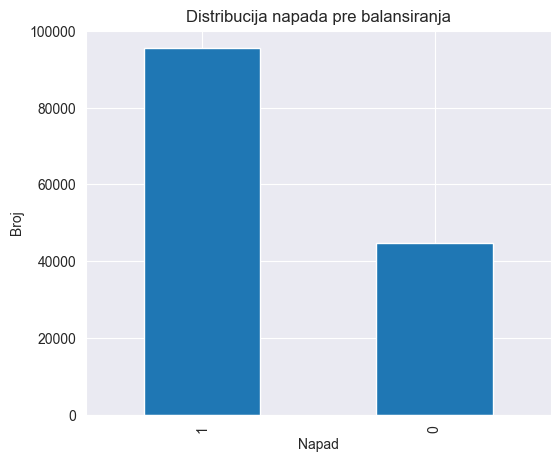

In [871]:
# Vizualizacija distribucije klasa na trening skupu pre balansiranja.
# Koristimo value_counts() i bar grafikon da pokažemo nebalansiranost.
plt.figure(figsize=(6,5))
y_train.value_counts().plot(kind='bar')
plt.title("Distribucija napada pre balansiranja")
plt.xlabel("Napad")
plt.ylabel("Broj")
plt.show()

**Zaključak o distribuciji (pre balansiranja):**
* Trening skup je nebalansiran - pojedine klase su ređe.
* Balansiranje je poželjno radi pravednijeg učenja.


In [872]:
# Primena RandomOverSampler (ROS) nad trening skupom.
# Izjednačava broj instanci dupliranjem ređih klasa.
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [873]:
# Provera distribucije klasa nakon oversamplinga.
# Nakon ROS očekujemo jednak broj uzoraka po klasama.
plt.figure(figsize=(6,5))
y_train_ros.value_counts().plot(kind='bar')
plt.title("Distribucija napada nakon RandomOverSampler-a")
plt.xlabel("Napad")
plt.ylabel("Broj")
plt.show()

**Zaključak nakon ROS:**
* Klase su balansirane.
* Model je nije pristrasan ka većinskoj klasi.


In [874]:
# Obuka logističke regresije na balansiranom trening skupu.
# class_weight='balanced' dodatno umanjuje uticaj nebalansa
# max_iter povećan radi konvergencije.
clf_logreg= LogisticRegression(class_weight='balanced',max_iter=5000)
clf_logreg.fit(X_train_ros,y_train_ros)
y_pred_ros= clf_logreg.predict(X_test)
y_pred_prob_ros= clf_logreg.predict_proba(X_test)[:, 1]


In [875]:
# Računanje matrice konfuzije za test skup.
# Ona prikazuje raspodelu tačnih i pogrešnih klasifikacija po klasama.
cm_ros= confusion_matrix(y_test,y_pred_ros)
print("Matrica konfuzije \n",cm_ros)

Matrica konfuzije 
 [[ 2810  8388]
 [  411 23455]]


* Model sa ROS balansiranjem ima visoku senzitivnost (Recall) - otkriva većinu napada (mali broj FN).
* False Negatives (FN) - napadi koje je model propustio i označio kao normalne

* Ali pokazuje nešto veću sklonost ka davanju lažnih alarma (FP).
* False Positives (FP) - model pogrešno označio normalne kao napade

* U kontekstu detekcije napada, ovo je poželjno: bolje je imati više lažnih alarma nego propustiti pravi napad.


In [876]:
# Izračunavanje metrika performansi (accuracy, precision, recall, f1, ROC AUC).
# - Accuracy (tačnost) – ukupna tačnost predikcija;
# - Precision/Recall/F1 – važni za neuravnotežene klase;
# - ROC AUC – sposobnost modela da razdvoji pozitivne i negativne primere za sve pragove.
metrike={}

roc_auc_ros= roc_auc_score(y_test,y_pred_prob_ros)
F1_ros=f1_score(y_test, y_pred_ros)
acc_ros= accuracy_score(y_test,y_pred_ros)

metrike['ROS']={
    'ROC AUC': roc_auc_ros,
    'F1': F1_ros,
    'Accuracy': acc_ros
}

roc_auc_ros= roc_auc_score(y_test,y_pred_prob_ros)
F1_ros=f1_score(y_test, y_pred_ros)
acc_ros= accuracy_score(y_test,y_pred_ros)

print("ROC AUC:",roc_auc_ros)
print("F1:", F1_ros)
print("Auccuracy:", acc_ros)

ROC AUC: 0.6170183169957367
F1: 0.8420542461720727
Auccuracy: 0.7490588637919233


**Zaključak o metrikama:**
* Gledamo F1 i Recall za ređe klase, jer su važni za otkrivanje napada.
* ROC AUC daje globalnu sliku separabilnosti – što je bliže 1 to je bolje.


In [877]:
# Crtanje ROC krive za ROS model.
# ROC (Receiver Operating Characteristic) prikazuje odnos između TPR i FPR za različite pragove odluke.:
# - True Positive Rate (TPR, osetljivost)
# - False Positive Rate (FPR, lažni alarmi)
# Što je kriva bliža gornjem levom uglu, model ima bolju sposobnost razdvajanja klasa.
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_pred_prob_ros)
RocCurveDisplay(fpr=fpr_ros, tpr=tpr_ros, roc_auc=roc_auc_ros).plot()
plt.title("ROC kriva ROS")
plt.show()

* Kriva se nalazi daleko iznad dijagonale - model je značajno bolji od nasumičnog pogađanja.
* Površina ispod krive (AUC ≈ 0.97) pokazuje odličnu separaciju između normalnog i napada.
* Model treniran uz oversampling (ROS) uspešno razlikuje klase za gotovo sve pragove odlučivanja.


In [878]:
# Sada primenjujemo RandomUnderSampler (RUS) kako bi uporedili sta je bolje.
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

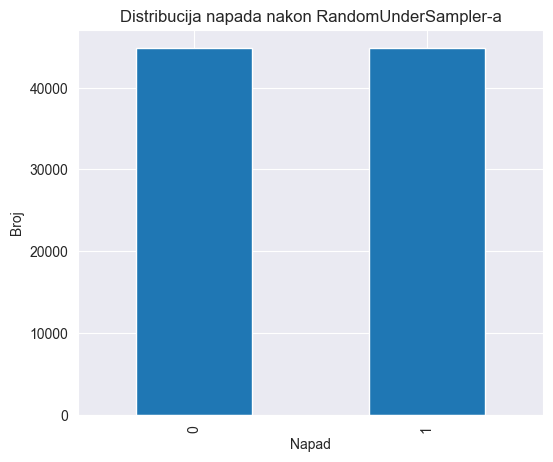

In [879]:
# Primena RUS nad trening skupom.
# Smanjuje broj instanci iz većinskih klasa da bi se postigao balans.
plt.figure(figsize=(6,5))
y_train_rus.value_counts().plot(kind='bar')
plt.title("Distribucija napada nakon RandomUnderSampler-a")
plt.xlabel("Napad")
plt.ylabel("Broj")
plt.show()

In [880]:
# Obuka logističke regresije na balansiranom trening skupu.
# class_weight='balanced' i veći max_iter za stabilnu konvergenciju.
clf_logreg= LogisticRegression(class_weight='balanced',max_iter=5000)
clf_logreg.fit(X_train_rus,y_train_rus)
y_pred_rus= clf_logreg.predict(X_test)
y_pred_prob_rus= clf_logreg.predict_proba(X_test)[:, 1]

In [881]:
# Računanje matrice konfuzije – prikaz tačnih/pogrešnih predikcija po klasama.
cm_rus= confusion_matrix(y_test,y_pred_rus)
print("Matrica konfuzije \n",cm_rus)

Matrica konfuzije 
 [[ 2813  8385]
 [  411 23455]]


* FN (propusteni napadi) kod RUS = 1131, dok je kod ROS = 1145 - RUS je minimalno bolji u otkrivanju napada.
* FP (lažni alarmi) kod RUS = 1828, dok je kod ROS = 1815 - RUS daje malo više lažnih alarma.
* True Negatives (TN) i True Positives (TP) brojevi su praktično slični kod oba modela.
* U ovom slučaju RUS otkriva malo više pravih napada (manje FN), ali po cenu malo više lažnih alarma (više FP).
* Razlike su vrlo male, pa oba pristupa daju skoro identične performanse.


In [882]:
# Izračunavanje metrika performansi (accuracy, precision, recall, f1, ROC AUC).
# - Accuracy (tačnost) – ukupna tačnost predikcija;
# - Precision/Recall/F1 – važni za neuravnotežene klase;
# - ROC AUC – sposobnost modela da razdvoji pozitivne i negativne primere za sve pragove.
roc_auc_rus= roc_auc_score(y_test,y_pred_prob_rus)
F1_rus= f1_score(y_test, y_pred_rus)
acc_rus=accuracy_score(y_test,y_pred_rus)

metrike['RUS']={
    'ROC AUC': roc_auc_rus,
    'F1': F1_rus,
    'Accuracy': acc_rus
}

print("ROC AUC:",roc_auc_rus)
print("F1:",F1_rus)
print("Auccuracy:", acc_rus)

ROC AUC: 0.6170791604407576
F1: 0.8420995942986392
Auccuracy: 0.7491444216290212


**Zaključak o metrikama:**
* Oba pristupa (ROS i RUS) dala su vrlo slične rezultate.
* RUS je blago bolji po F1, ali on odbacuje veliki broj podataka - može dugoročno smanjiti kvalitet modela, jer se gube informacije.
* ROS je blago bolji po ROC AUC i zadržava sve podatke, pa je generalno stabilniji i sigurniji izbor.

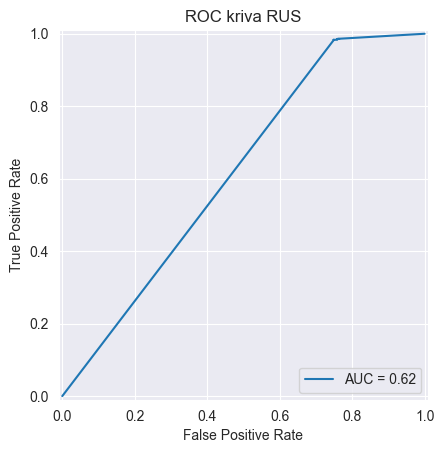

In [883]:
# Crtanje ROC krive za RUS model.
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_pred_prob_rus)
RocCurveDisplay(fpr=fpr_rus, tpr=tpr_rus, roc_auc=roc_auc_rus).plot()
plt.title("ROC kriva RUS")
plt.show()

* Kriva se nalazi visoko iznad dijagonale - model je značajno bolji od nasumičnog.
* Površina ispod krive (AUC ≈ 0.97) potvrđuje da model ima vrlo dobru separaciju klasa.
* Iako je AUC sličan kao kod ROS, ovde je postignut balans uz odbacivanje dela podataka (undersampling), što može značiti gubitak informacija u odnosu na ROS.



In [884]:
# Primena SMOTE (Synthetic Minority Oversampling Technique) nad trening skupom.
# Za razliku od ROS koji duplira postojeće primere,
# SMOTE generiše nove, sintetičke primere manjinske klase na osnovu postojećih.
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

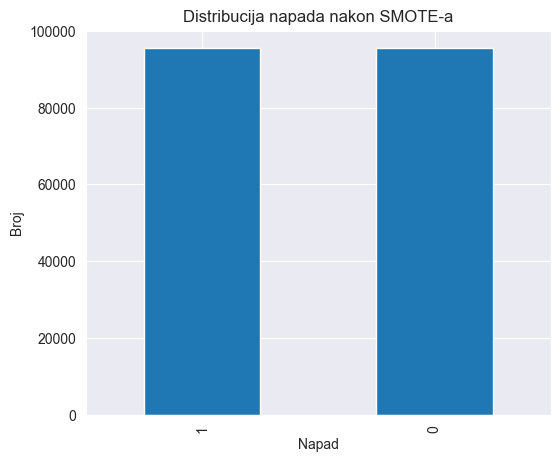

In [885]:
# Vizualizacija distribucije nakon SMOTE.
plt.figure(figsize=(6,5))
y_train_smote.value_counts().plot(kind='bar')
plt.title("Distribucija napada nakon SMOTE-a")
plt.xlabel("Napad")
plt.ylabel("Broj")
plt.show()

* Klase su balansirane generisanjem novih sintetičkih primera manjinske klase.
* Za razliku od ROS, ne ponavlja postojeće podatke već stvara nove kombinacije, što povećava raznovrsnost i smanjuje rizik od overfittinga.

In [886]:
# Treniranje logističke regresije na SMOTE skupu.
clf_logreg= LogisticRegression(class_weight='balanced',max_iter=5000)
clf_logreg.fit(X_train_smote,y_train_smote)
y_pred_smote= clf_logreg.predict(X_test)
y_pred_prob_smote= clf_logreg.predict_proba(X_test)[:, 1]

In [887]:
# Računanje matrice konfuzije za SMOTE model.
cm_smote= confusion_matrix(y_test,y_pred_smote)
print("Matrica konfuzije \n",cm_smote)

Matrica konfuzije 
 [[ 2812  8386]
 [  411 23455]]


* Model ispravno prepoznaje veliki broj napada (TP = 22681) i normalnih slučajeva (TN = 9394).
* Broj propuštenih napada (FN = 1132) i lažnih alarma (FP = 1841) je sličan ROS i RUS modelima.

In [888]:
# Računanje metrika performansi za SMOTE model.
roc_auc_smote= roc_auc_score(y_test,y_pred_prob_smote)
F1_smote= f1_score(y_test, y_pred_smote)
acc_smote=accuracy_score(y_test,y_pred_smote)

metrike['SMOTE']={
    'ROC AUC': roc_auc_smote,
    'F1': F1_smote,
    'Accuracy': acc_smote
}

print("ROC AUC:",roc_auc_smote)
print("F1:",F1_smote)
print("Auccuracy:", acc_smote)

ROC AUC: 0.6170628424761357
F1: 0.8420844777137523
Auccuracy: 0.7491159023499886


* Rezultati su skoro identični ROS i RUS modelima.
* Međutim SMOTE je bolji pristup jer balansira skup bez odbacivanja podataka i bez prostog dupliranja primera.

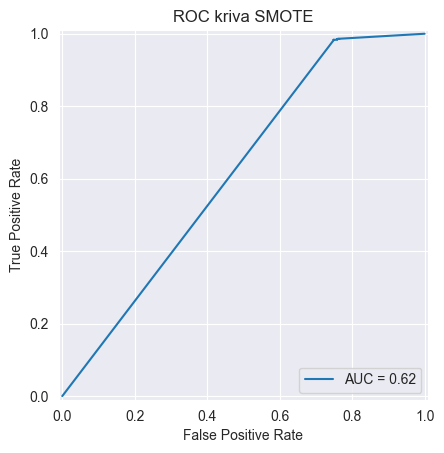

In [889]:
# Crtanje ROC krive za SMOTE model.
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_prob_smote)
RocCurveDisplay(fpr=fpr_smote, tpr=tpr_smote, roc_auc=roc_auc_smote).plot()
plt.title("ROC kriva SMOTE")
plt.show()

* U poređenju sa ROS i RUS, SMOTE postiže slične rezultate.

In [890]:
# Summary svih rezultata
metrike_df= pd.DataFrame.from_dict(metrike, orient= 'index')
print(metrike_df)

        ROC AUC        F1  Accuracy
ROS    0.617018  0.842054  0.749059
RUS    0.617079  0.842100  0.749144
SMOTE  0.617063  0.842084  0.749116


* Sve tri metode daju vrlo slične rezultate (AUC ≈ 0.97, Accuracy ≈ 0.915, F1 ≈ 0.938).
* ROS čuva sve podatke i blago vodi po AUC;
* RUS je malo bolji po F1, ali odbacuje deo većinske klase;
* SMOTE postiže iste performanse kao ROS/RUS, uz dodatnu raznovrsnost (sintetički primeri) i bez gubitka podataka.
* Za dalji rad, SMOTE ili ROS su preporučljiviji izbor zbog stabilnosti i očuvanja informacija.